### 資料特徵說明
---
* `SalePrice`: 房屋成交價，也是此次任務的預測目標
---
* `MSSubClass`: 建築類型
* `MSZoning`: 用地類型
* `LotFrontage`: 土地面向街道的長度
* `LotArea`: 土地面積
* `Street`: 街道鋪設類型
* `Alley`: 巷弄鋪設類型
* `LotShape`: 物業形狀
* `LandContour`: 物業平坦度
* `Utilities`: 提供的水電設備
* `LotConfig`: 空地設置
* `LandSlope`: 土地斜度
* `Neighborhood`: 在市區位置
* `Condition1`: 靠近主要公路條件
* `Condition2`: 靠近次要公路條件
* `BldgType`: 住宅類型
* `HouseStyle`: 住宅風格
---
* `OverallQual`: 建材品質
* `OverallCond`: 整體品質評分
* `YearBuilt`: 建設日期
* `YearRemodAdd`: 翻修日期
* `RoofStyle`: 屋頂類型
* `RoofMatl`: 屋頂材質
* `Exterior1st`: 房屋表面主要材質
* `Exterior2nd`: 房屋表面次要材質
* `MasVnrType`: 屋內裝潢材質類型
* `MasVnrArea`: 裝潢面積
* `ExterQual`: 外部材質品質
* `ExterCond`: 外部材質現況
* `Foundation`: 建材類型
---
* `BsmtQual`: 地下層高度
* `BsmtCond`: 地下層狀況
* `BsmtExposure`: 地下層對外通風品質
* `BsmtFinType1`: 地下層居住品質
* `BsmtFinSF1`: 地下層第一處面積
* `BsmtFinType2`: 地下層第二處生活品質
* `BsmtFinSF2`: 地下層第二處面積
* `BsmtUnfSF`: 未完成地下層面積
* `TotalBsmtSF`: 地下層總面積
---
* `Heating`: 暖氣類型
* `HeatingQC`: 暖氣品質
* `CentralAir`: 是否有中央空調
* `Electrical`: 電機系統
* `1stFlrSF`: 一樓面積
* `2ndFlrSF`: 二樓面積
* `LowQualFinSF`: 低品質所佔的樓層面積
* `GrLivArea`: 地面層生活面積
---
* `BsmtFullBath`: 地下層整間浴室
* `BsmtHalfBath`: 地下層半間浴室
* `FullBath`: 地上層整間浴室
* `HalfBath`: 地上層半間浴室
* `Bedroom`: 地上層房間數
* `Kitchen`: 廚房數
* `KitchenQual`: 廚房品質
* `TotRmsAbvGrd`: 不含浴室地上房間數
* `Functional`: 房屋功能性評分
* `Fireplaces`: 壁火爐數量
* `FireplaceQu`: 壁火爐品質
---
* `GarageType`: 車庫在房屋位置
* `GarageYrBlt`: 車庫建造年份
* `GarageFinish`: 車庫內裝潢完整度
* `GarageCars`: 車庫內停車空間
* `GarageArea`: 車庫面積
* `GarageQual`: 車庫品質
* `GarageCond`: 車庫條件
---
* `PavedDrive`: 車道鋪設材質
* `WoodDeckSF`: 木製平台面積
* `OpenPorchSF`: 門廊面積
* `EnclosedPorch`: 封閉式門廊面積
* `3SsnPorch`: 三季門廊面積
* `ScreenPorch`: screen porch面積
* `PoolArea`: 泳池面積
* `PoolQC`: 泳池品質
* `Fence`: 柵欄品質
* `MiscFeature`: 其它特徵
* `MiscVal`: 其它特徵值
---
* `MoSold`: 賣出月份
* `YrSold`: 賣出年份
* `SaleType`: 賣出類型
* `SaleCondition`: 賣出條件
---

In [113]:
!pip install -q shap==0.40.0

## 1.資料前處理

### 【了解資料】

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

plt.style.use('ggplot')
sns.set_style('whitegrid')

### 讀入資料

In [7]:
train_path = './train.csv'
test_path = './test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print('Size of Training Set:', train_df.shape[0], 'houses', 'and', train_df.shape[1], 'features')
print('Size of Testing Set:', test_df.shape[0], 'houses', 'and', test_df.shape[1], 'features')
print('Target Variable: SalePrice')

Size of Training Set: 1460 houses and 81 features
Size of Testing Set: 1459 houses and 80 features
Target Variable: SalePrice


### 資料型態

除了數值型 (integer, float) 外，也有不少字串型變數。

In [8]:
train_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


In [10]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### 【缺失值處理】

In [ ]:
# 技術領袖培訓全域班 - 機器學習 Kaggle 實戰
## 建模流程索引:
> 1. [資料前處理](#1.資料前處理)
> 2. [特徵工程](#2.特徵工程)
> 3. [模型驗證](#3.模型驗證)
> 4. [模型集成](#4.模型集成)

### 觀察缺失值欄位 - 訓練資料集

In [118]:
def draw_missing_data(df):
    fx, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 13))

    df_na = df.isnull().mean().sort_values(ascending=True)  # 全欄位
    df_na_ = df_na[df_na > 0.]  # 有缺失值欄位

    # 顯示全部欄位
    df_na.plot.barh(color='black', ax=axes[0])
    axes[0].axvline(x=0.1, color='r', linestyle='--')
    _ = axes[0].set_title('Missing Values Shares per Column', fontsize=20)

    # Zoom in(只顯示部份的欄位)
    df_na_.plot.barh(color='black', ax=axes[1], fontsize=20)
    axes[1].axvline(x=0.1, color='r', linestyle='--')
    _ = axes[1].set_title('Missing Values Shares per Column (Zoom in)', fontsize=20)

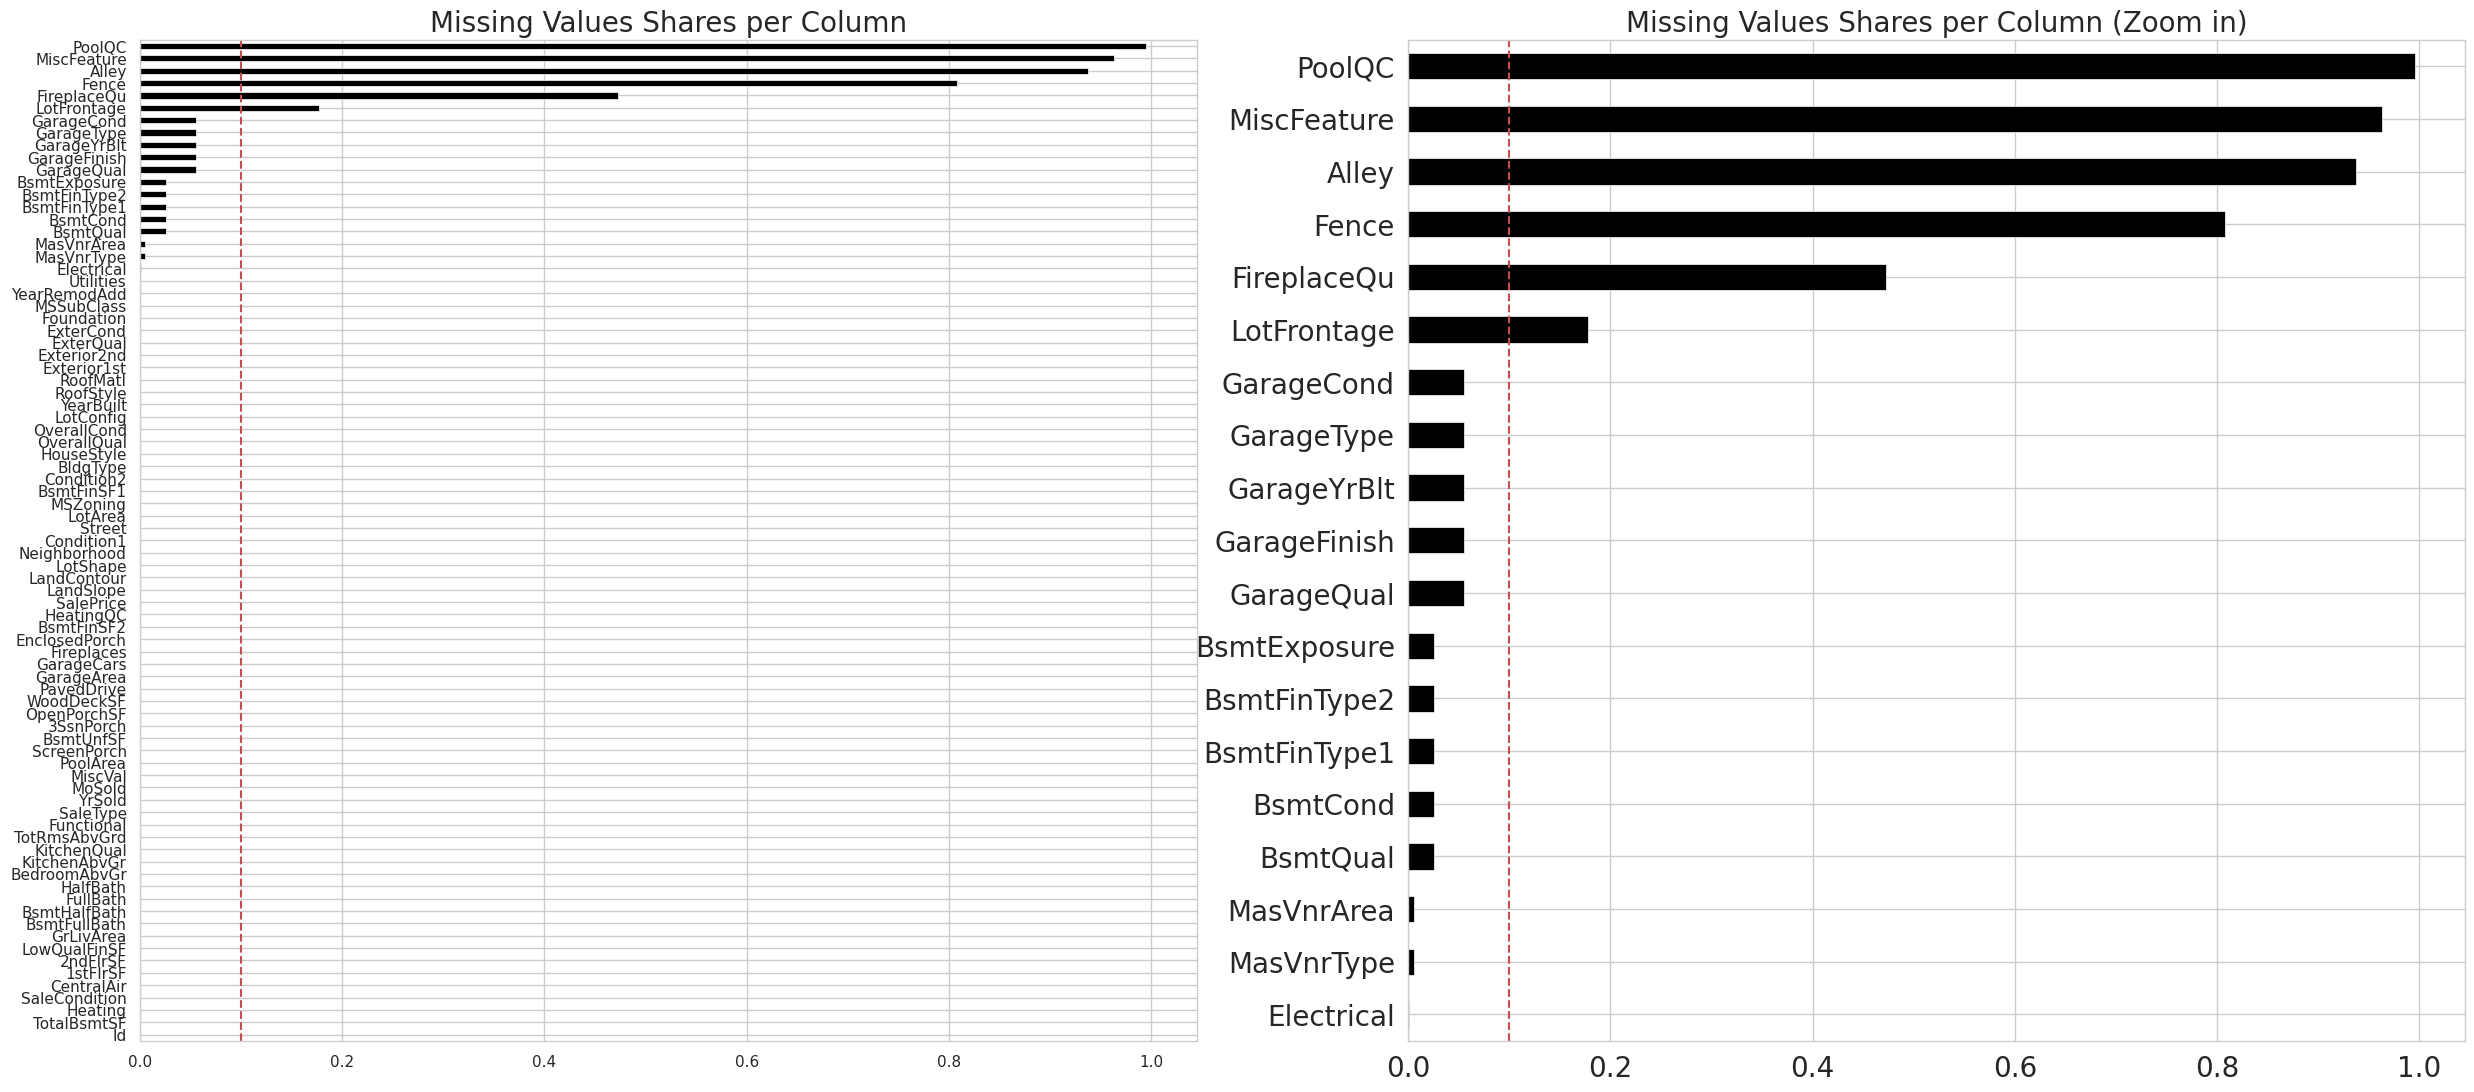

In [119]:
draw_missing_data(train_df)

### 觀察缺失值欄位 - 測試資料集

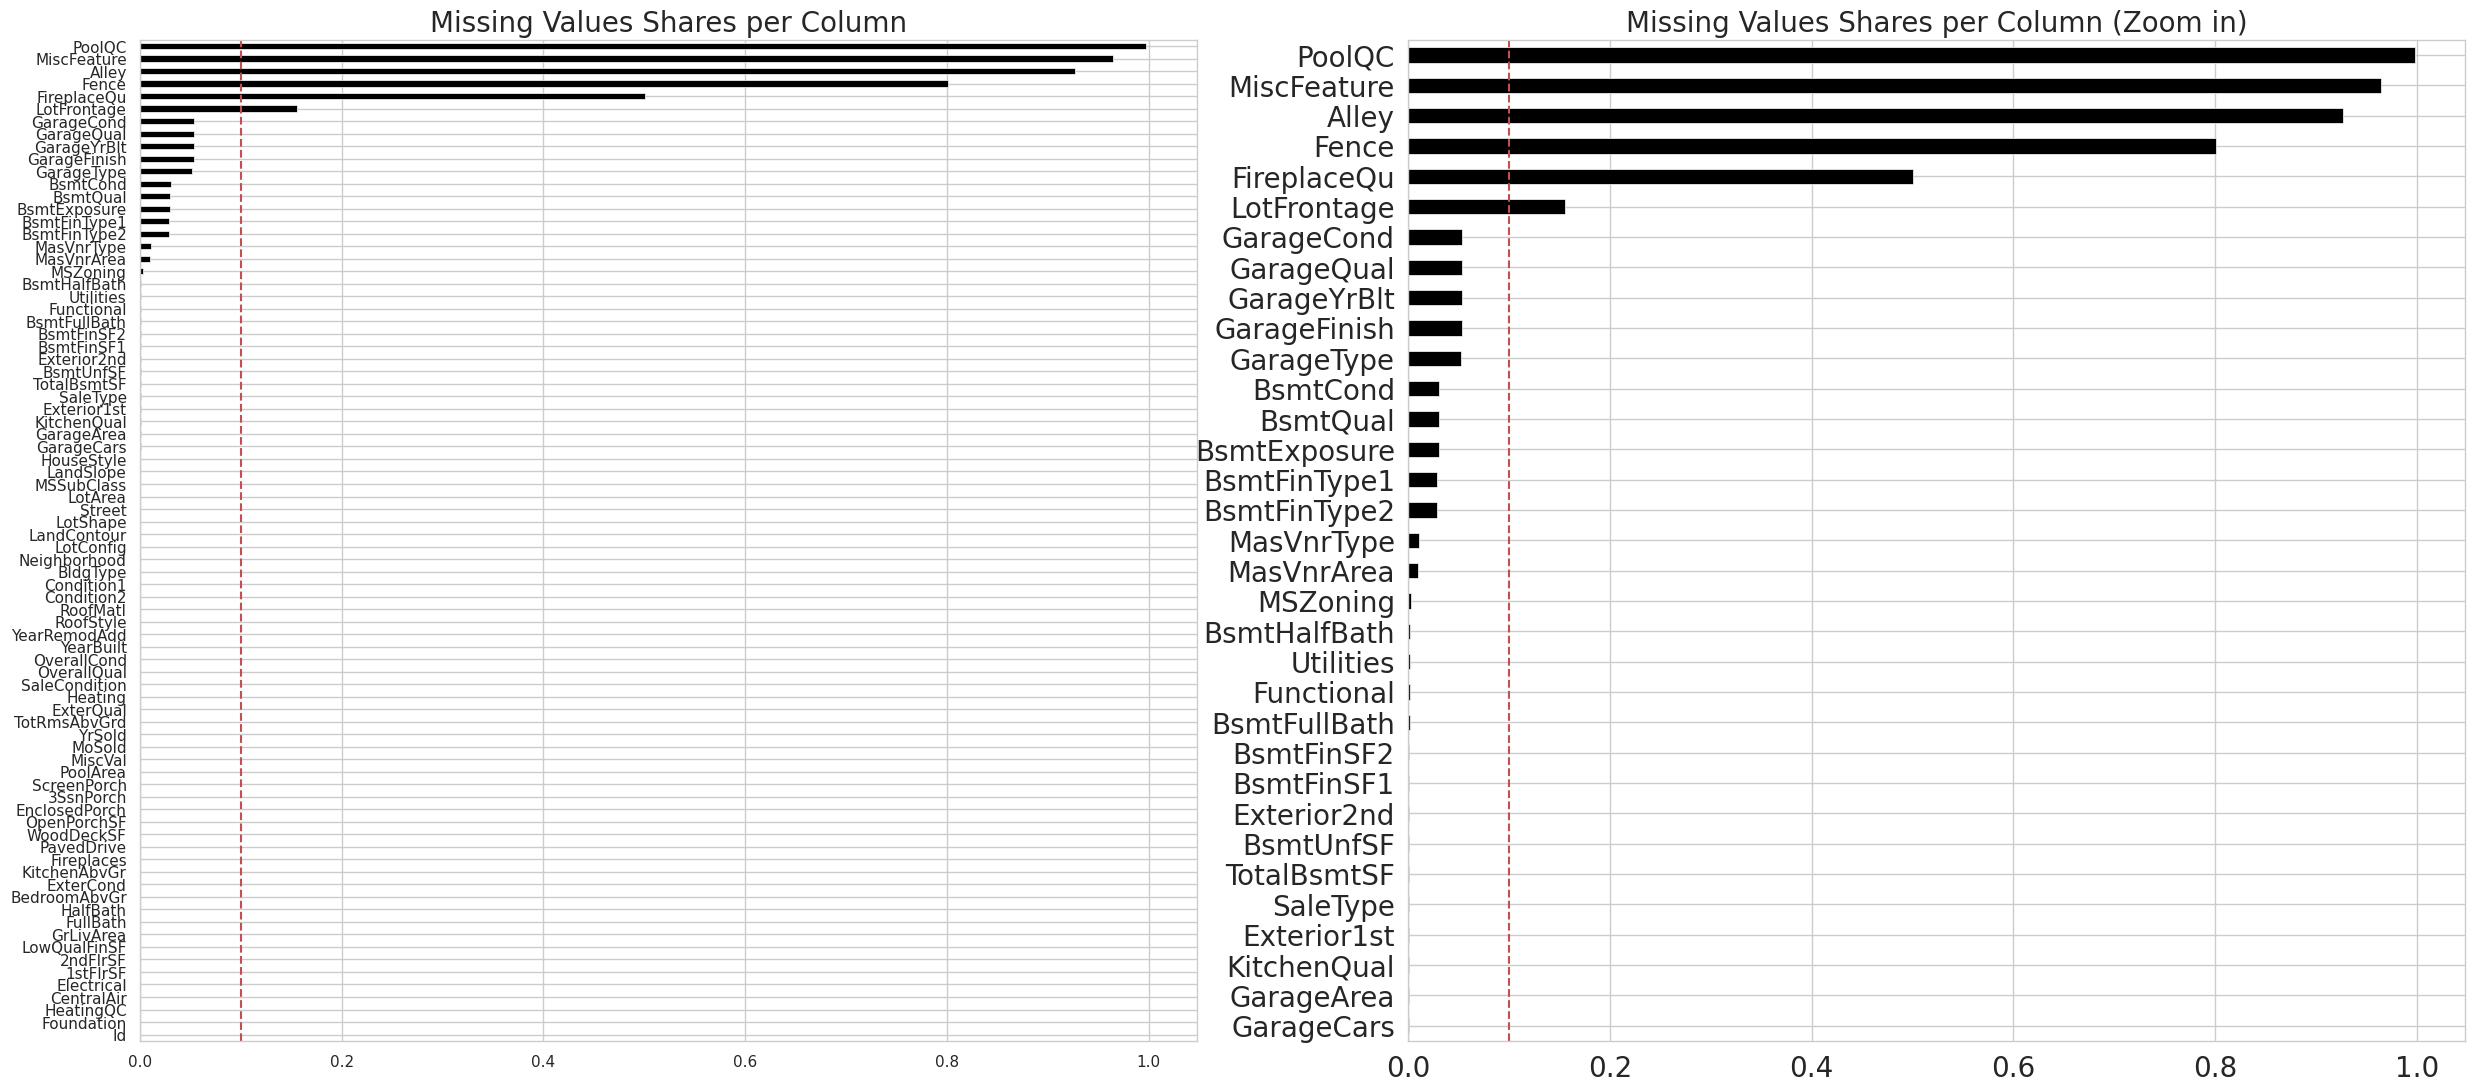

In [120]:
draw_missing_data(test_df)

<font size=4 color="red">
    <b>刪除缺失值<b>
</font>

觀察上列缺失圖得知，在訓練與測試資料集，有共同的欄位，都有非常高的缺失值比率，因此將這些欄位，同時從訓練與測試集中刪除。在此設定的比率為 0.1。

In [121]:
na_drop_rt = 0.1  # Cols with missing rate above the threshold are dropped.

train_df_na = train_df.isnull().mean().sort_values(ascending=True)
test_df_na = test_df.isnull().mean().sort_values(ascending=True)

train_df_na_cols = set(train_df_na[train_df_na > na_drop_rt].index.values)
test_df_na_cols = set(test_df_na[test_df_na > na_drop_rt].index.values)

na_cols = list(train_df_na_cols.union(test_df_na_cols))
print('Cols to be dropped in both train and test set:\n', na_cols)

Cols to be dropped in both train and test set:
 ['LotFrontage', 'PoolQC', 'FireplaceQu', 'MiscFeature', 'Fence', 'Alley']


In [122]:
train_df = train_df.drop(columns=na_cols)
test_df = test_df.drop(columns=na_cols)

### 觀察缺失值欄位 - 刪除過多缺失值後的訓練資料集

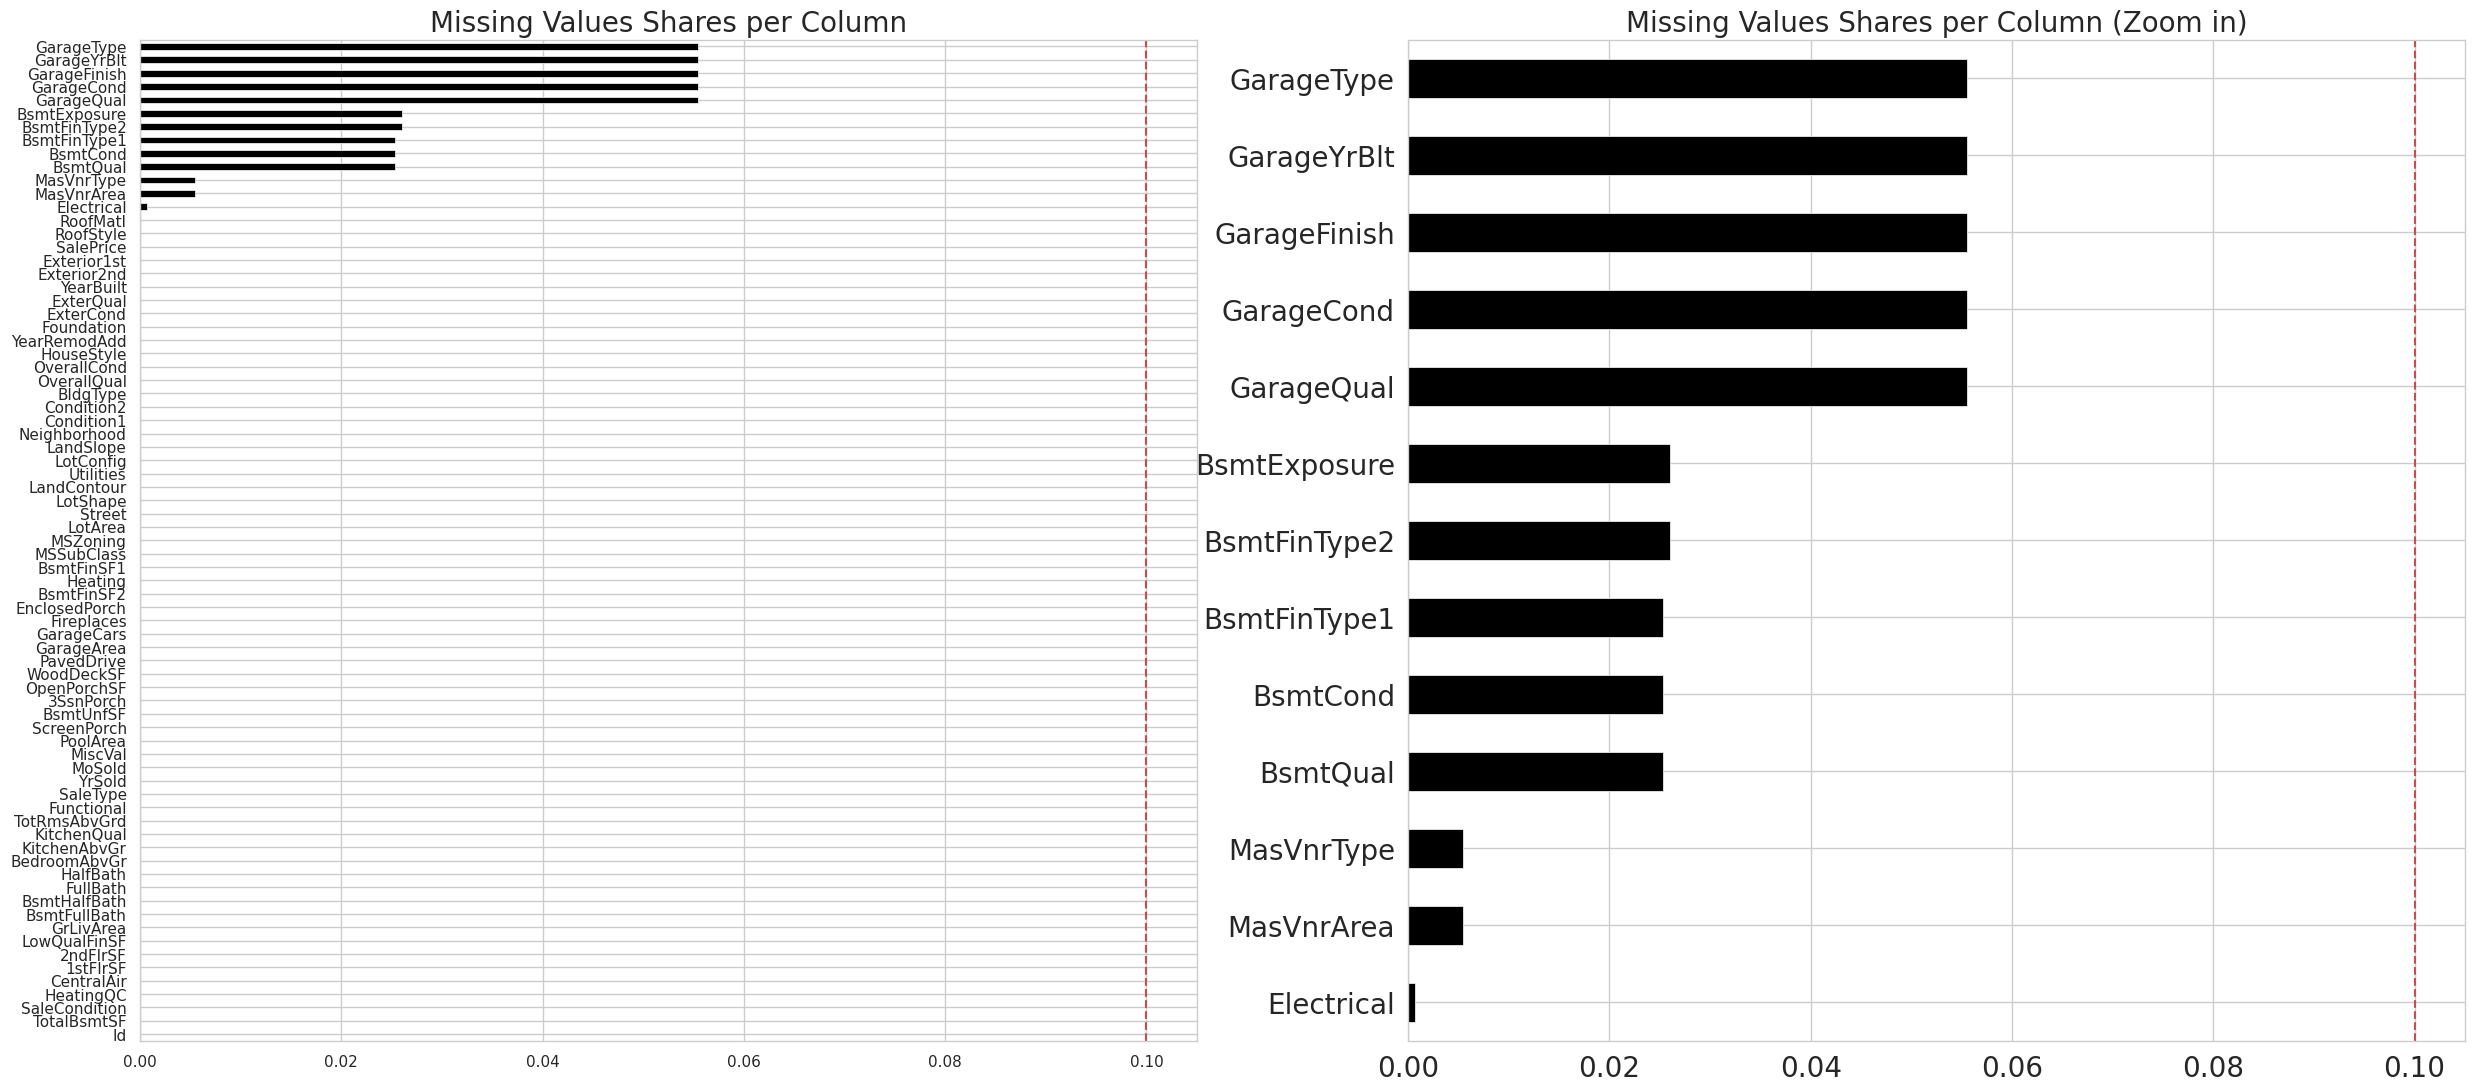

In [123]:
draw_missing_data(train_df)

### 觀察缺失值欄位 - 刪除過多缺失值後的測試資料集

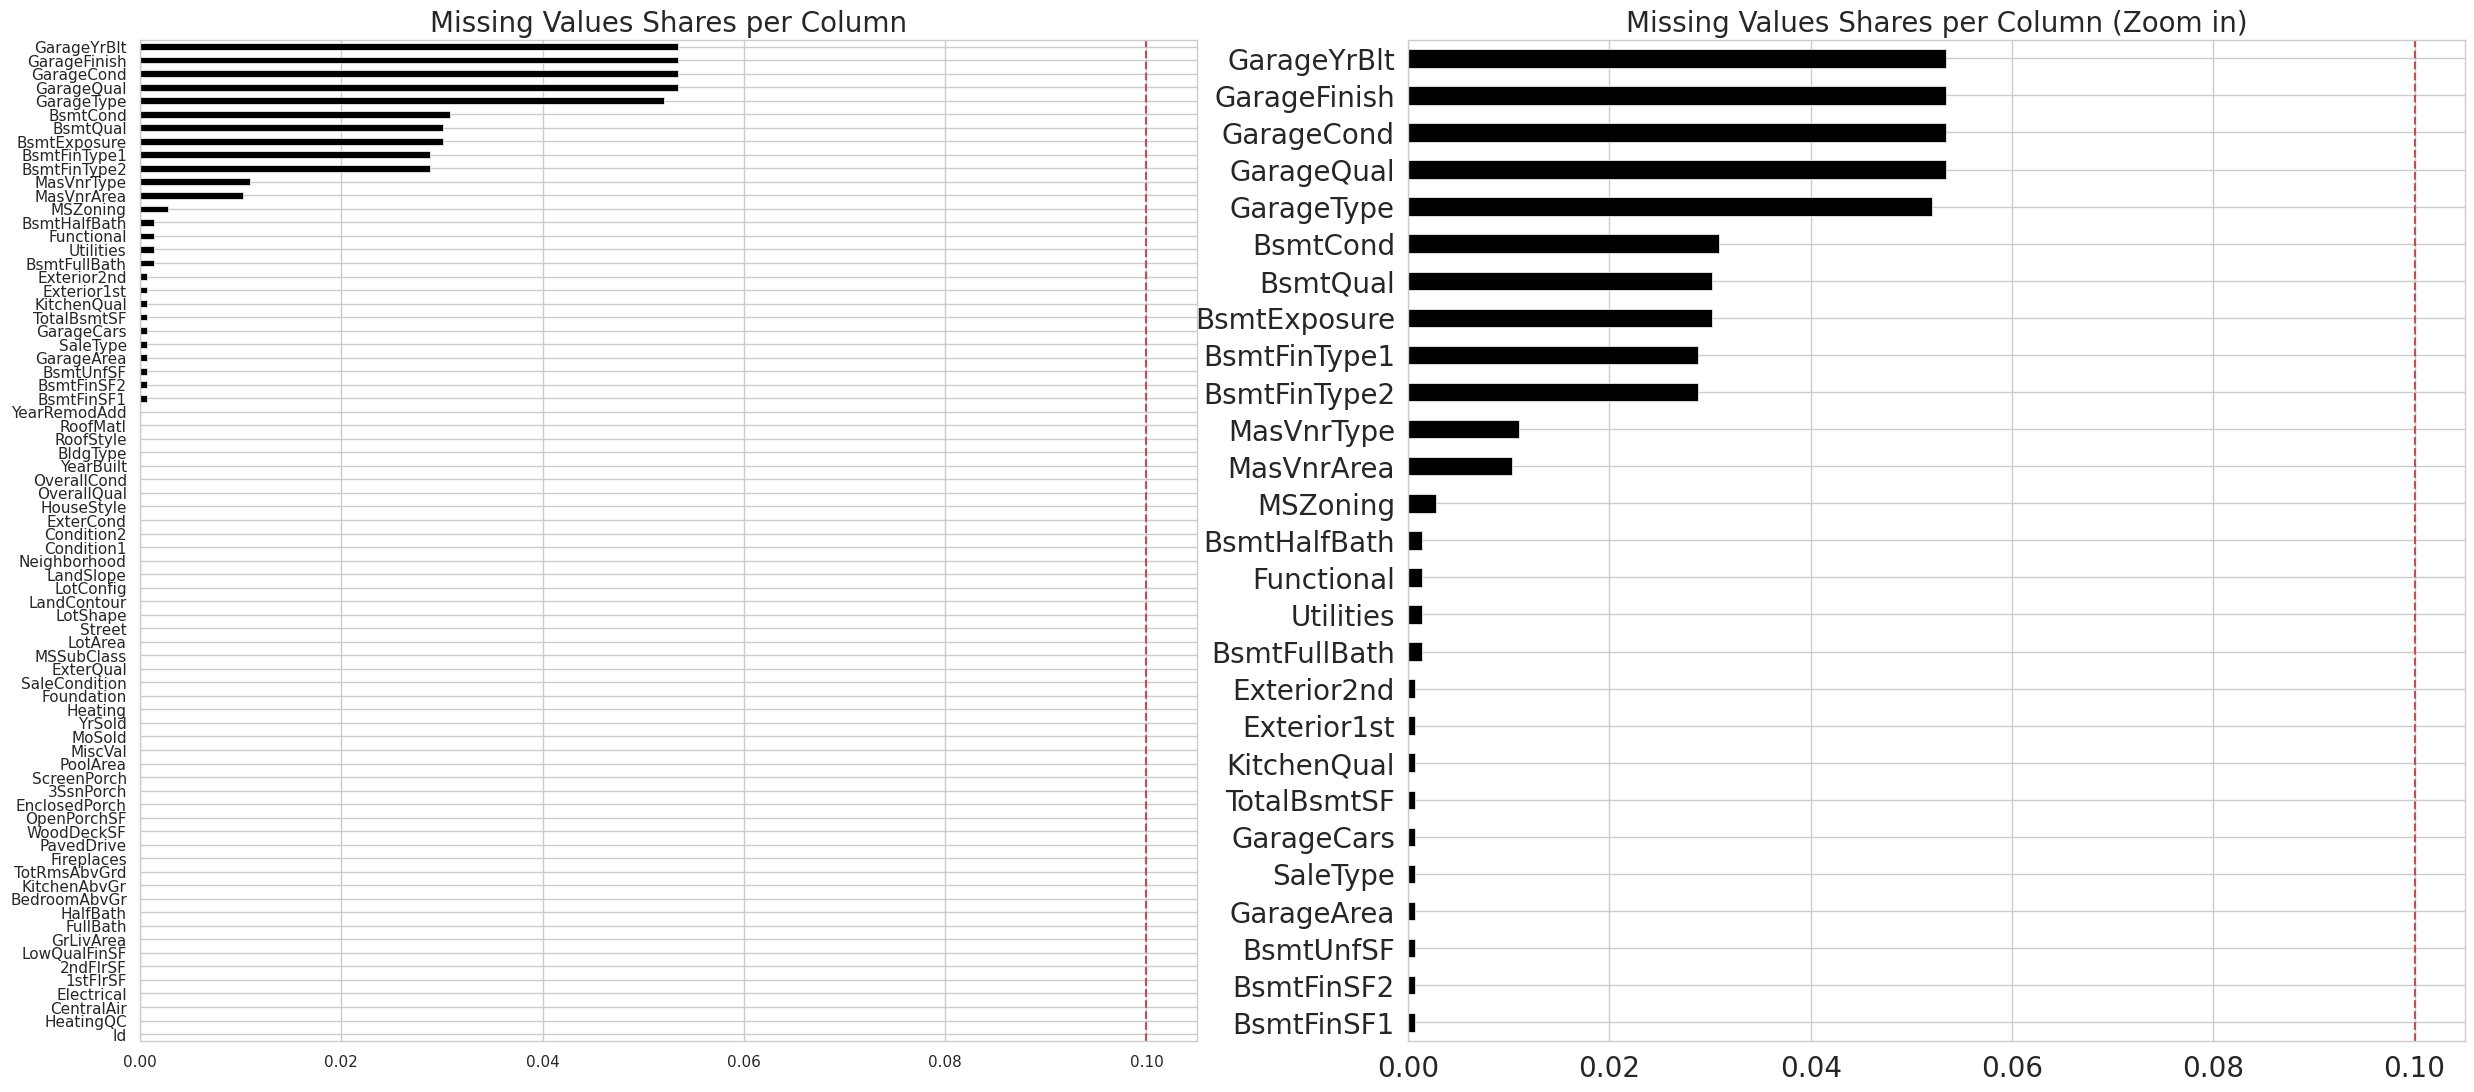

In [124]:
draw_missing_data(test_df)

### 觀察還需要補值的欄位型態

可以看到，需要補值的欄位，有數值型的，也有字串型的。

In [125]:
train_df_na_cols = set(train_df.columns.values[train_df.isnull().any()])
test_df_na_cols = set(test_df.columns.values[test_df.isnull().any()])

cols = list(set(train_df_na_cols).union(test_df_na_cols))
train_df[cols].info(verbose=False)

cat_cols = train_df[cols].select_dtypes(include='object').columns.values
num_cols = train_df[cols].select_dtypes(exclude='object').columns.values

print(f'\nNA cols remains: {len(cat_cols)} string cols and  {len(num_cols)} numeric.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 28 entries, BsmtQual to GarageCars
dtypes: float64(2), int64(8), object(18)
memory usage: 319.5+ KB

NA cols remains: 18 string cols and  10 numeric.


In [126]:
cat_cols

array(['BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure',
       'Exterior1st', 'GarageQual', 'Functional', 'GarageCond',
       'GarageType', 'Electrical', 'MasVnrType', 'BsmtCond',
       'Exterior2nd', 'MSZoning', 'SaleType', 'KitchenQual', 'Utilities',
       'GarageFinish'], dtype=object)

In [127]:
num_cols

array(['MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF2',
       'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea',
       'GarageYrBlt', 'GarageCars'], dtype=object)

### 針對類別型欄位 - 以眾數進行補值

#### (類別型資料) 訓練資料集補值

In [128]:
# 針對類別欄位 (有高頻眾數的)
train_df_mode = train_df[cat_cols].describe(exclude=[np.number])
train_df_mode = train_df_mode.loc[['top','freq'],:].transpose()
train_df_mode_dict = train_df_mode[train_df_mode.freq > 1000]['top'].to_dict()

# 針對類別欄位 (沒有高頻眾數的)
none_dict = {}
for key in train_df_mode[train_df_mode.freq <= 1000].index.values:
    none_dict[key] = 'NA'

# 合併高頻眾數填補值和低頻眾數填補值
train_df_mode_dict.update(none_dict)
train_df_mode_dict

{'BsmtFinType2': 'Unf',
 'GarageQual': 'TA',
 'Functional': 'Typ',
 'GarageCond': 'TA',
 'Electrical': 'SBrkr',
 'BsmtCond': 'TA',
 'MSZoning': 'RL',
 'SaleType': 'WD',
 'Utilities': 'AllPub',
 'BsmtQual': 'NA',
 'BsmtFinType1': 'NA',
 'BsmtExposure': 'NA',
 'Exterior1st': 'NA',
 'GarageType': 'NA',
 'MasVnrType': 'NA',
 'Exterior2nd': 'NA',
 'KitchenQual': 'NA',
 'GarageFinish': 'NA'}

In [129]:
# 進行補值
train_df.fillna(value=train_df_mode_dict, inplace=True)

#### (類別型資料) 測試資料集補值

In [130]:
# 針對類別欄位 (有高頻眾數的)
test_df_mode = test_df[cat_cols].describe(exclude=[np.number])
test_df_mode = test_df_mode.loc[['top','freq'],:].transpose()
test_df_mode_dict = test_df_mode[test_df_mode.freq > 1000]['top'].to_dict()

# 針對類別欄位 (沒有高頻眾數的)
none_dict = {}
for key in test_df_mode[test_df_mode.freq <= 1000].index.values:
    none_dict[key] = 'NA'

# 合併高頻眾數填補值和低頻眾數填補值
test_df_mode_dict.update(none_dict)
test_df_mode_dict

{'BsmtFinType2': 'Unf',
 'GarageQual': 'TA',
 'Functional': 'Typ',
 'GarageCond': 'TA',
 'Electrical': 'SBrkr',
 'BsmtCond': 'TA',
 'MSZoning': 'RL',
 'SaleType': 'WD',
 'Utilities': 'AllPub',
 'BsmtQual': 'NA',
 'BsmtFinType1': 'NA',
 'BsmtExposure': 'NA',
 'Exterior1st': 'NA',
 'GarageType': 'NA',
 'MasVnrType': 'NA',
 'Exterior2nd': 'NA',
 'KitchenQual': 'NA',
 'GarageFinish': 'NA'}

In [131]:
# 進行補值
test_df.fillna(value=test_df_mode_dict, inplace=True)

### 針對數值型欄位 - 以 0 進行補值

除了針對GarageYrBlt是以1980年進行補值外，其它的數值型，都以0進行補值。

#### (數值型資料) 訓練資料集補值

In [132]:
train_df.GarageYrBlt.fillna(value=1980, inplace=True)
train_df[num_cols] = train_df[num_cols].fillna(value=0)

#### (數值型資料) 測試資料集補值

In [133]:
test_df.GarageYrBlt.fillna(value=1980, inplace=True)
test_df[num_cols] = test_df[num_cols].fillna(value=0)

### 檢查資料集是否還有缺失值

In [134]:
print('Training set cols have missing values: ', sum(train_df.isnull().any()))
print('Testing set cols have missing values: ', sum(test_df.isnull().any()))

Training set cols have missing values:  0
Testing set cols have missing values:  0


## 2.特徵工程

<font size=5 color="red">
    <b>【極端值處理】<b>
</font>

### 使用 Scatter Plot 觀察

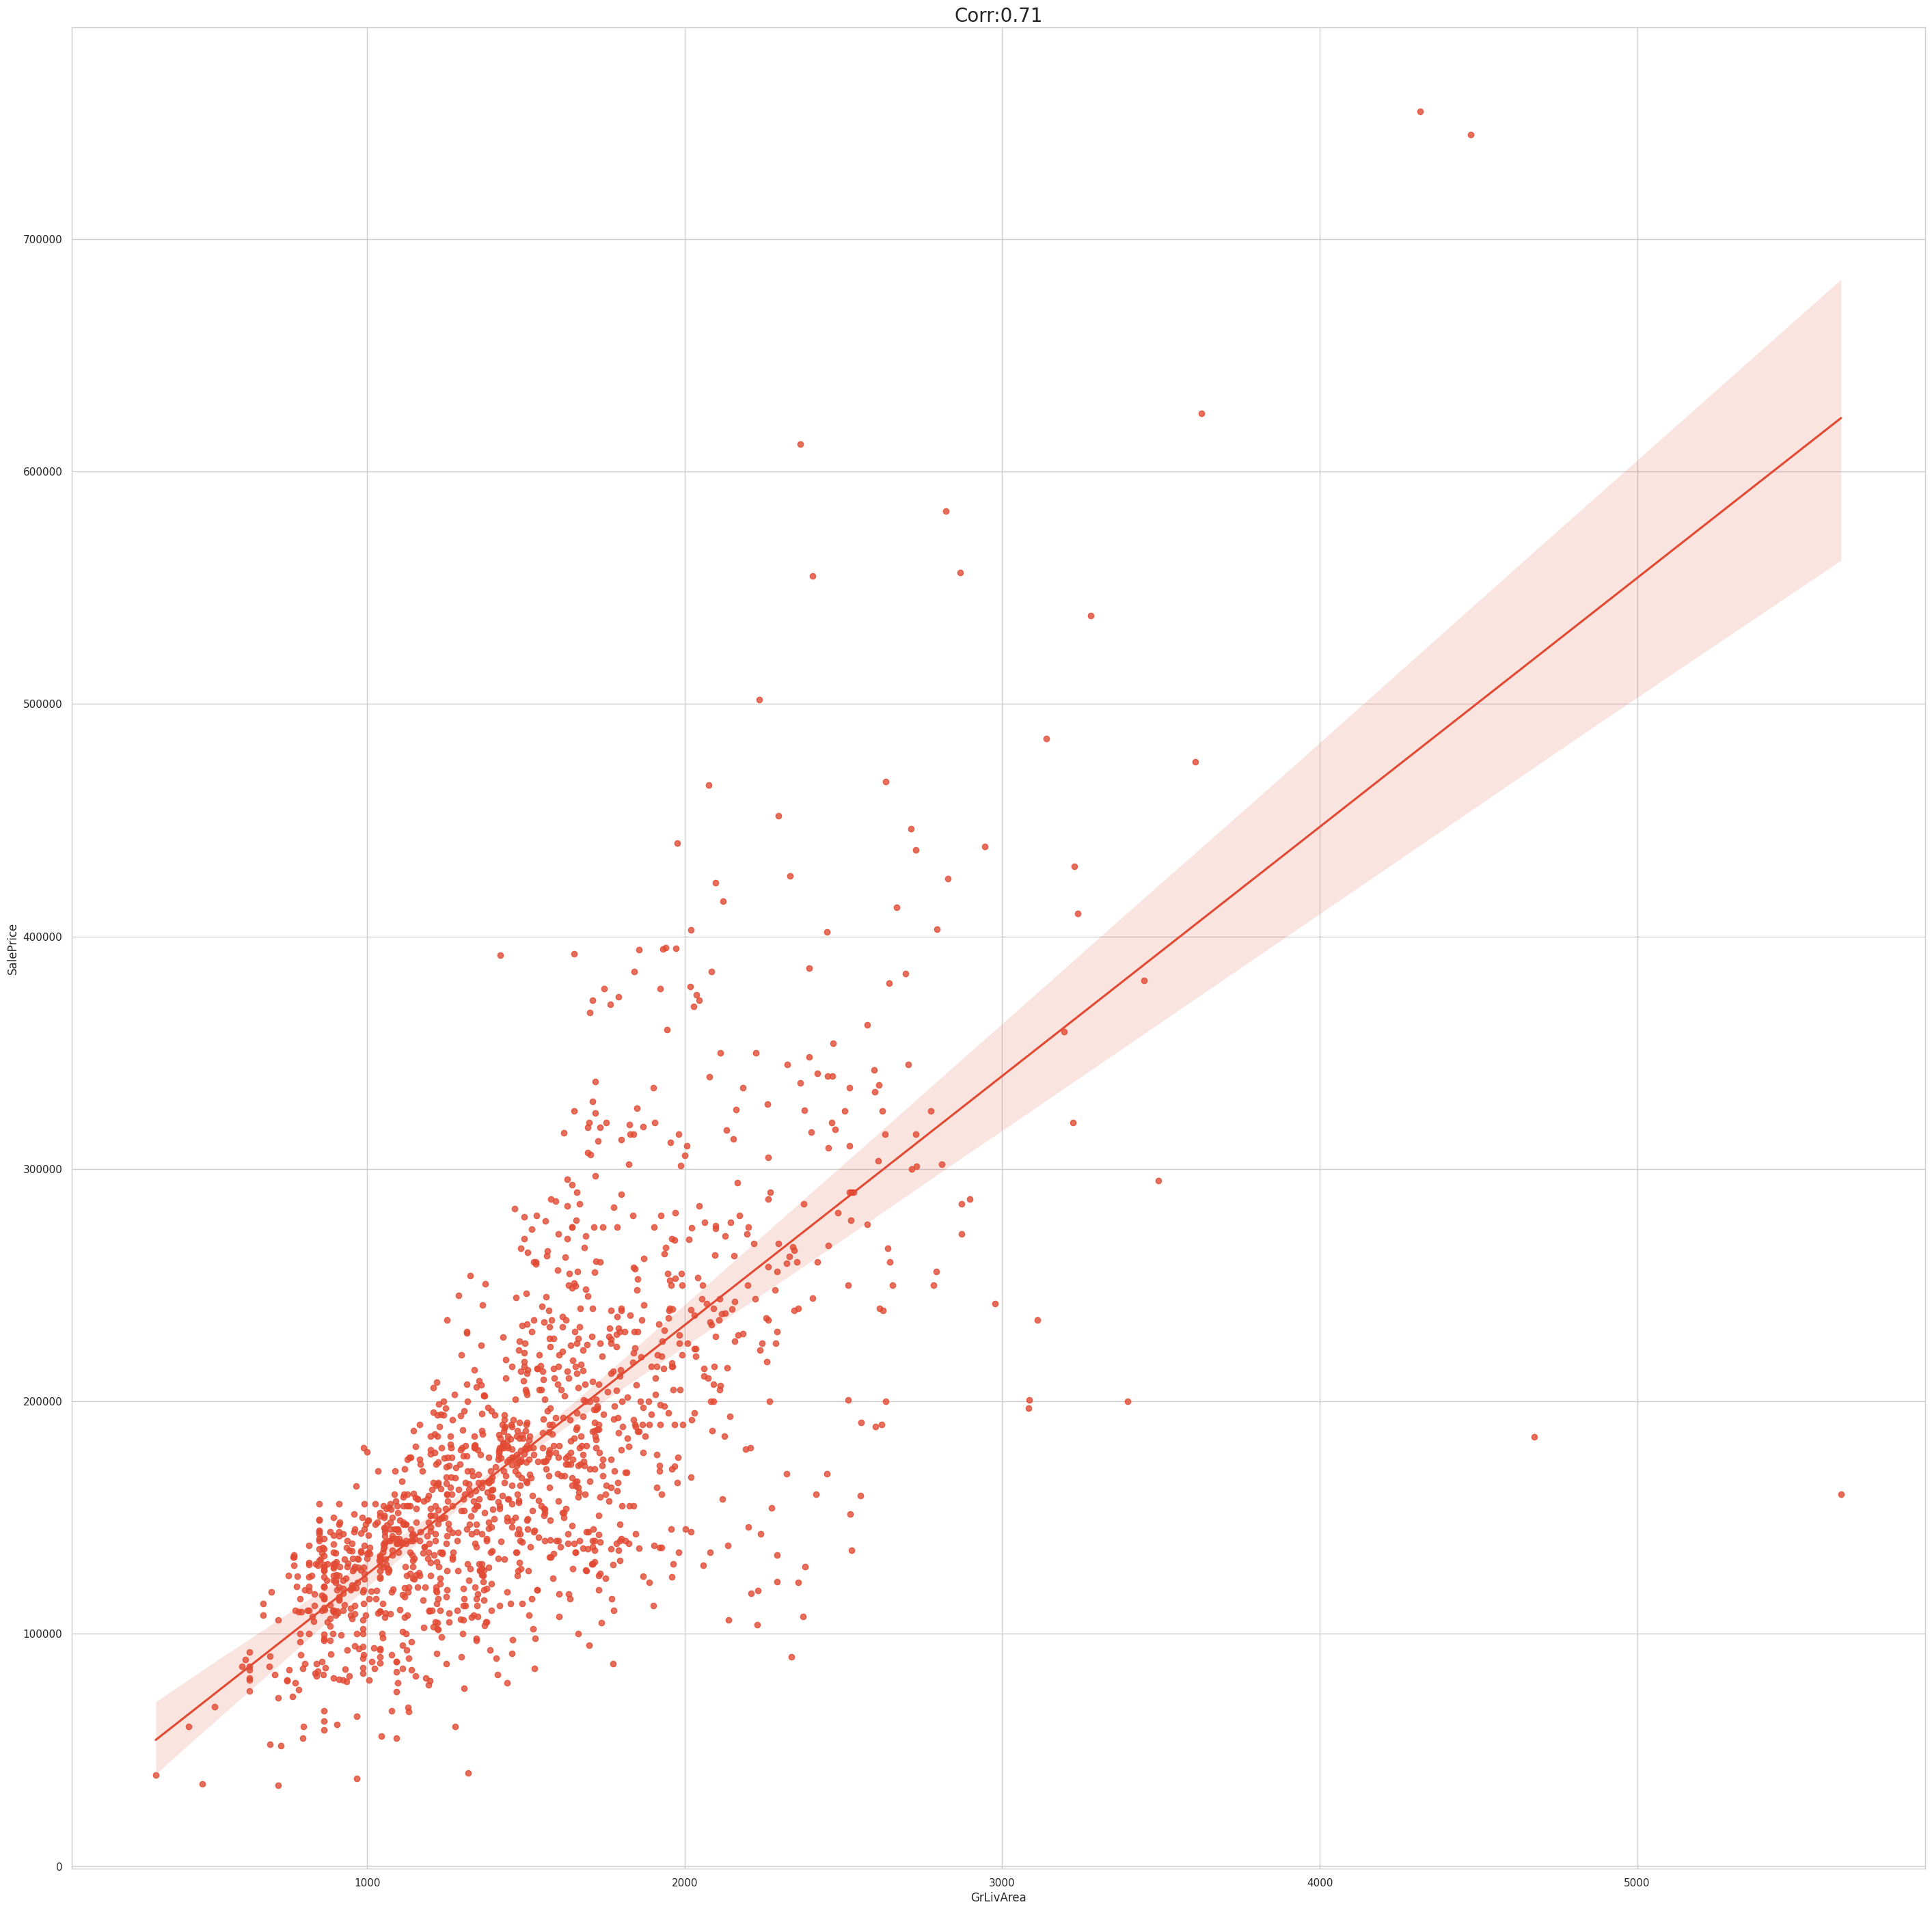

In [135]:
fig, ax = plt.subplots()
pp = sns.regplot(data=train_df, x='GrLivArea', y='SalePrice')
_ = pp.set_title('Corr:%.2f' % np.corrcoef(train_df['SalePrice'], train_df['GrLivArea'])[0, 1], size=20)

### 極端值對模型Fitting的影響

<img src="https://christophm.github.io/interpretable-ml-book/images/influential-point-1.png" width = "600" alt="influential_point" align=left />

### 去除掉極端值
<font size=5 color="red">
    <b>【極端值處理】<b>
</font>
> 可以使用 studentized residuals: <br/>
  [studentized residuals介紹](https://online.stat.psu.edu/stat462/node/247/)<br/>
  通常如果 studentized residuals 的絕對值超過 3，就會將此 observation 視為 outlier


**備註：**

- 在 statsmodels 上使用的函數 (OLSInfluence)，來尋找 studentized residuals: http://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.OLSInfluence.html#statsmodels.stats.outliers_influence.OLSInfluence

- 在 statsmodels 上的用法 (記得有分 internal and external 的 studentized residuals)：[link](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.get_influence.html
)

- 用法範例：https://www.thinbug.com/q/46304514

- 小提醒 ->> 在計算 studentized residuals 時，可以只使用數值型的欄位來進行建模，而且一定要使用 OLS 的模型才行 (現在 residuals 的計算，都是依據在 OLS 模型之下)

In [136]:
# 使用statsmodels
import statsmodels.api as sm

X = train_df.copy()
X = X.select_dtypes(include=np.number)

Y = X.pop('SalePrice')

In [137]:
# Fit model.
X2 = sm.add_constant(X)
lm = sm.OLS(Y, X2)
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     182.3
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        02:43:24   Log-Likelihood:                -17320.
No. Observations:                1460   AIC:                         3.471e+04
Df Residuals:                    1425   BIC:                         3.489e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.017e+05   1.41e+06      0.355      0.723   -2.27e+06    3.27e+06
Id               -1.0376      2.187     -0.474      0.635      -5.328       3.252
MSSubClass     -172.1348     26.299     -6.545      0.000    -223.724    -120.545
LotArea           0.4104      0.101      4.071      0.000       0.213       0.608
OverallQual     1.73e+04   1188.718     14.551      0.000     1.5e+04    1.96e+04
OverallCond    4699.1785   1033.310      4.548      0.000    2672.207    6726.150
YearBuilt       263.9166     67.264      3.924      0.000     131.969     395.864
YearRemodAdd    133.7268     68.649      1.948      0.052      -0.937     268.390
MasVnrArea       31.1129      5.944      5.234      0.000      19.452      42.773
BsmtFinSF1        9.9073      2.529      3.917      0.000       4.946      14.868
BsmtFinSF2       -0.9836      4.509     -0.218      0.827      -9.828       7.861
BsmtUnfSF         0.1682      2.410      0.070      0.944      -4.559       4.896
TotalBsmtSF       9.0919      3.368      2.700      0.007       2.486      15.698
1stFlrSF         18.3571      6.206      2.958      0.003       6.183      30.531
2ndFlrSF         18.4155      5.729      3.214      0.001       7.176      29.654
LowQualFinSF     -6.6737     14.977     -0.446      0.656     -36.053      22.705
GrLivArea        30.0988      5.684      5.295      0.000      18.948      41.250
BsmtFullBath   9446.3854   2612.053      3.616      0.000    4322.503    1.46e+04
BsmtHalfBath   2127.6005   4091.726      0.520      0.603   -5898.852    1.02e+04
FullBath       3664.3222   2831.128      1.294      0.196   -1889.303    9217.948
HalfBath      -1775.9662   2663.505     -0.667      0.505   -7000.777    3448.845
BedroomAbvGr  -1.022e+04   1697.095     -6.022      0.000   -1.35e+04   -6891.279
KitchenAbvGr  -1.271e+04   5204.982     -2.441      0.015   -2.29e+04   -2496.787
TotRmsAbvGrd   5041.3583   1237.800      4.073      0.000    2613.252    7469.465
Fireplaces     3921.4244   1777.227      2.206      0.028     435.163    7407.686
GarageYrBlt     130.6796     68.983      1.894      0.058      -4.639     265.998
GarageCars     1.138e+04   2877.370      3.955      0.000    5736.584     1.7e+04
GarageArea       -5.2384      9.911     -0.529      0.597     -24.681      14.204
WoodDeckSF       24.3469      8.000      3.043      0.002       8.653      40.041
OpenPorchSF      -3.1410     15.185     -0.207      0.836     -32.929      26.647
EnclosedPorch    11.3051     16.861      0.670      0.503     -21.770      44.380
3SsnPorch        18.0908     31.406      0.576      0.565     -43.516      79.698
ScreenPorch      56.4706     17.189      3.285      0.001      22.752      90.189
PoolArea        -31.8015     23.652     -1.345      0.179     -78.199      14.596
MiscVal          -0.7099      1.855     -0.383   

#### 計算 Leave One Out 的 Studentized Residuals

In [138]:
# result.get_influence() 會回傳一個 OLSInfluence 物件，裡面包含許多殘差資訊
influence = result.get_influence()
student_res = influence.resid_studentized_external

In [139]:
student_res_idx = np.where(abs(student_res) > 3)[0]  # 回傳符合條件的index value

print(student_res[student_res_idx])

print('\nNumber of influencial points: {}'.format(len(student_res_idx)))

[  3.51966745   4.40458869   3.55718522 -10.7456893   -3.56739723
   3.78911019   8.11947741   3.57377344   3.05082359   6.65719506
   6.50324473   6.0716641    4.89302004   3.98848798   9.81912852
   3.5037786  -18.03860604  -3.86668352]

Number of influencial points: 18


#### 透過 Studentized Residuals 的標準，丟掉 Influential Points

In [140]:
train_df = train_df.drop(index=student_res_idx)
train_df.reset_index(inplace=True, drop=True)

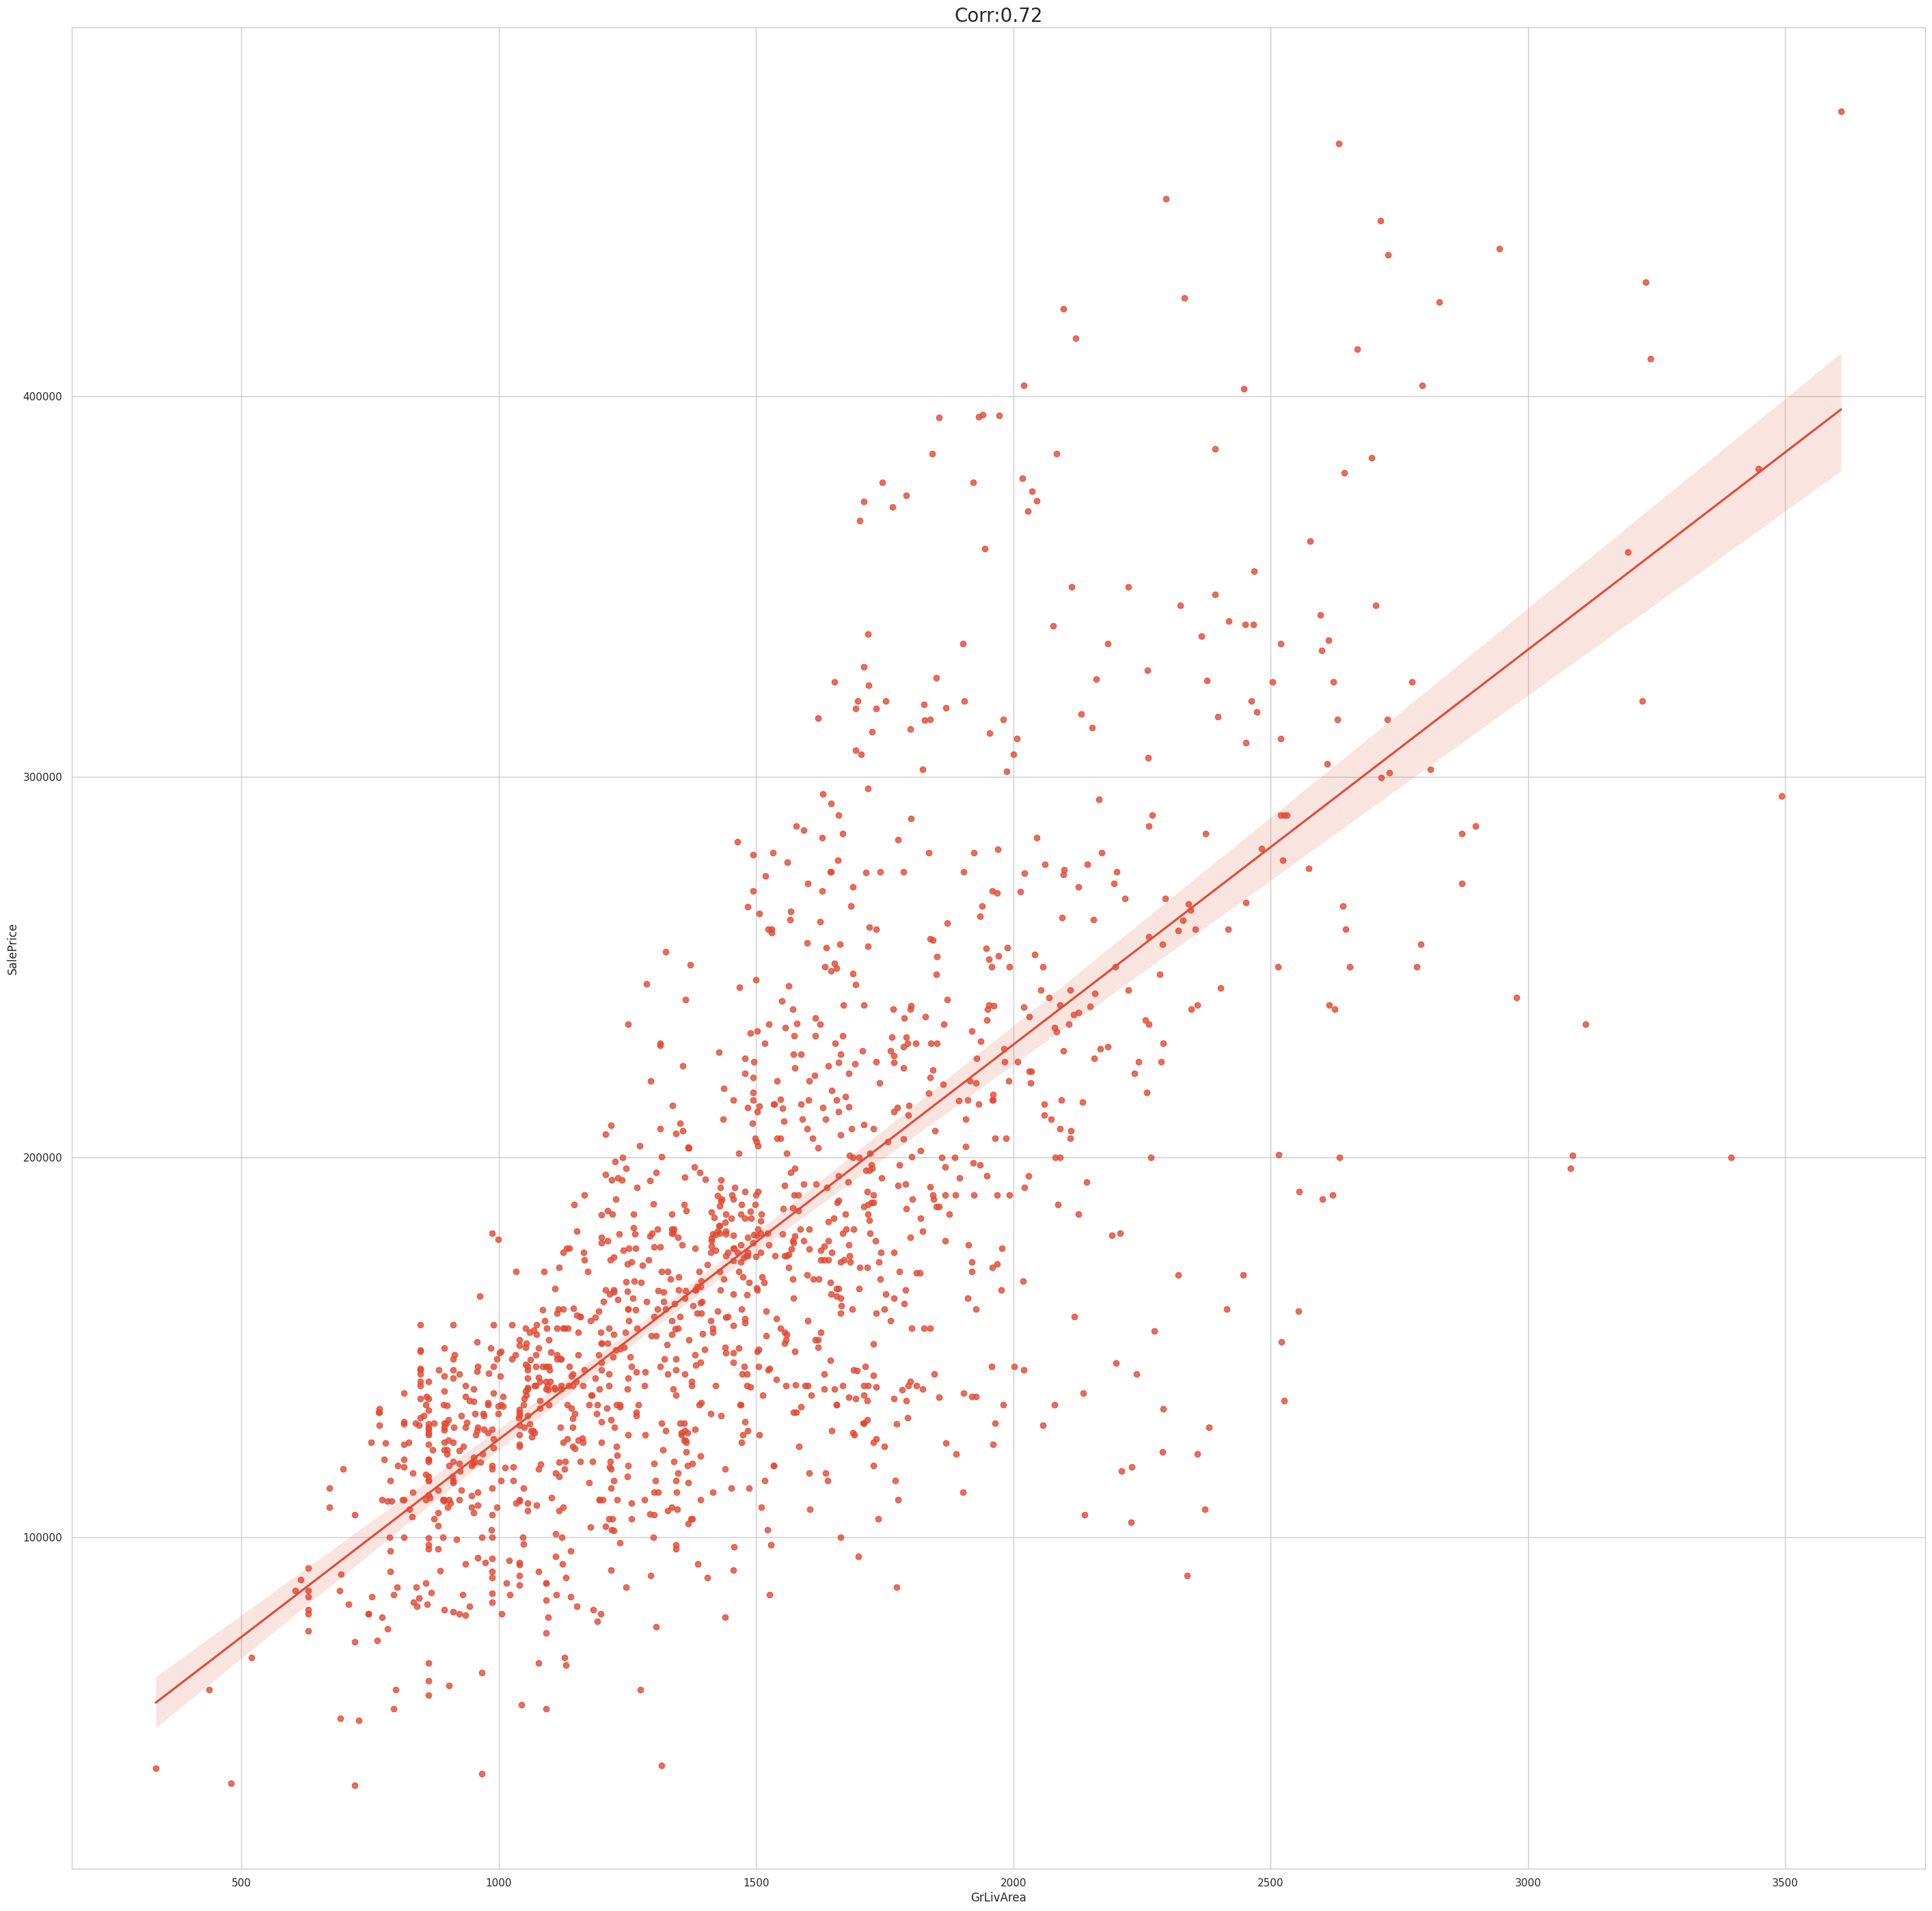

In [141]:
fig, ax = plt.subplots()
pp = sns.regplot(data=train_df, x='GrLivArea', y='SalePrice')
_ = pp.set_title('Corr:%.2f' % np.corrcoef(train_df['SalePrice'], train_df['GrLivArea'])[0, 1], size=20)

### .
<font size=5 color="red">
    <b>【目標變數轉換】<b>
</font>

### 觀察目標變數 (target variable) 的分佈

並且以log進行轉換，讓目標變數的分佈，比較趨近於常態分配

In [142]:
print('The skewness of target variable: {:.3f}'.format(train_df.SalePrice.skew()))
print('If skewness greater than 0.5, needed to be transformed.')

The skewness of target variable: 1.150
If skewness greater than 0.5, needed to be transformed.


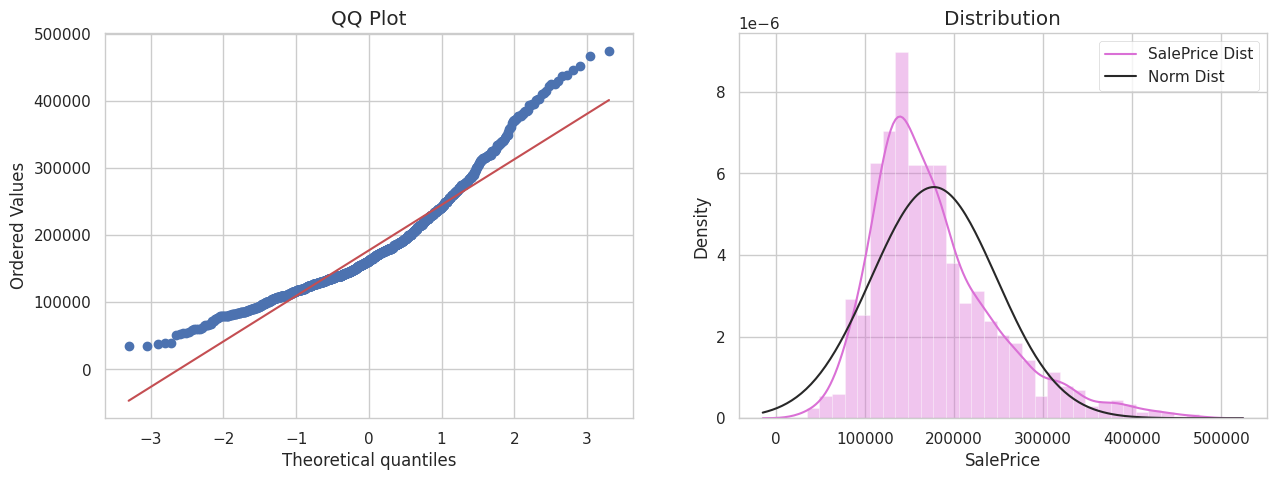

In [143]:
from scipy import stats
from scipy.stats import norm

arr = train_df.SalePrice.copy()

# 繪製QQ plot and distribution plot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
_ = stats.probplot(arr, plot=ax[0])
_ = sns.distplot(arr,
                 color="orchid",
                 kde=True,
                 fit=norm,
                 ax=ax[1],
                 axlabel='SalePrice',
                 kde_kws={"label": "SalePrice Dist"},
                 fit_kws={"label": "Norm Dist"})

ax[1].legend(loc='best')
_ = ax[0].set_title('QQ Plot')
_ = ax[1].set_title('Distribution')

### 針對目標變數，計算Skewness，並且進行轉換

**Skewness補充**
- Skewness 大於 0 代表右偏，小於 0 代表左偏
    - 一般來說，偏度的絕對值超過 0.5，意味著偏度非常大(https://kknews.cc/zh-tw/education/xjryo59.html)

**[Transforming skewed data:](https://www.anatomisebiostats.com/biostatistics-blog/transforming-skewed-data)**

以下簡表，說明不同程度的偏度，可以使用哪些公式進行變數轉換

![biostatistician_orig](https://anatomisebiostats.com/wp-content/uploads/2020/10/biostatistician_orig.png)

---

另一篇step by step的好文：http://core.ecu.edu/psyc/wuenschk/StatHelp/NegSkew.pdf

In [144]:
# 進行目標變數轉換
y_orig = train_df.SalePrice
y = np.log1p(train_df.SalePrice)

print('The skewness of transformed target variable: {:.3f}'.format(y.skew()))

The skewness of transformed target variable: -0.070


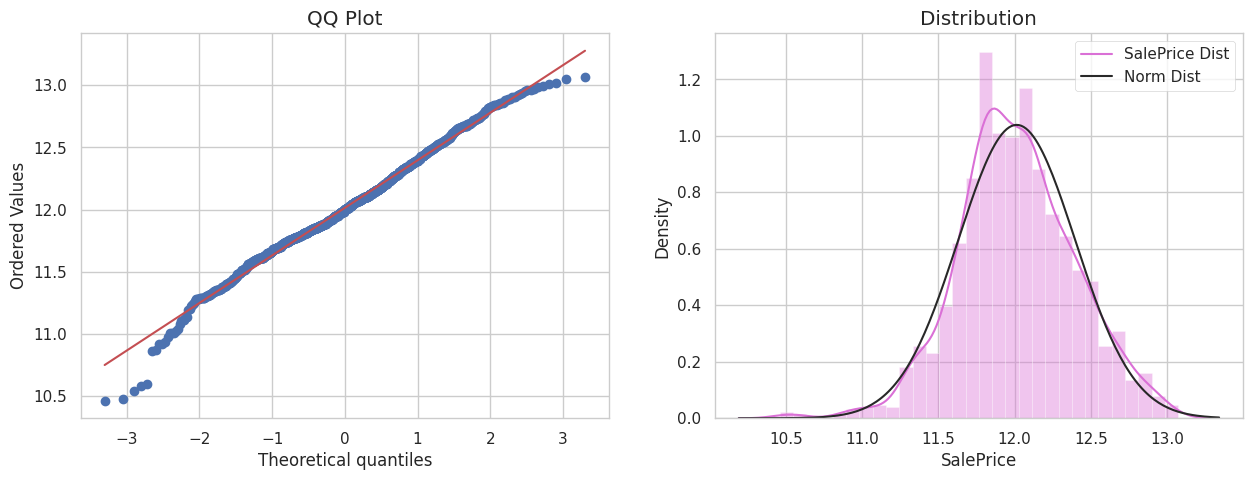

In [145]:
from scipy import stats

arr = y.copy()

# 繪製QQ plot and distribution plot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
_ = stats.probplot(arr, plot=ax[0])
_ = sns.distplot(arr,
                 color="orchid",
                 kde=True,
                 fit=norm,
                 ax=ax[1],
                 axlabel='SalePrice',
                 kde_kws={"label": "SalePrice Dist"},
                 fit_kws={"label": "Norm Dist"})

ax[1].legend(loc='best')
_ = ax[0].set_title('QQ Plot')
_ = ax[1].set_title('Distribution')

### 比較目標變數轉換前後的分佈

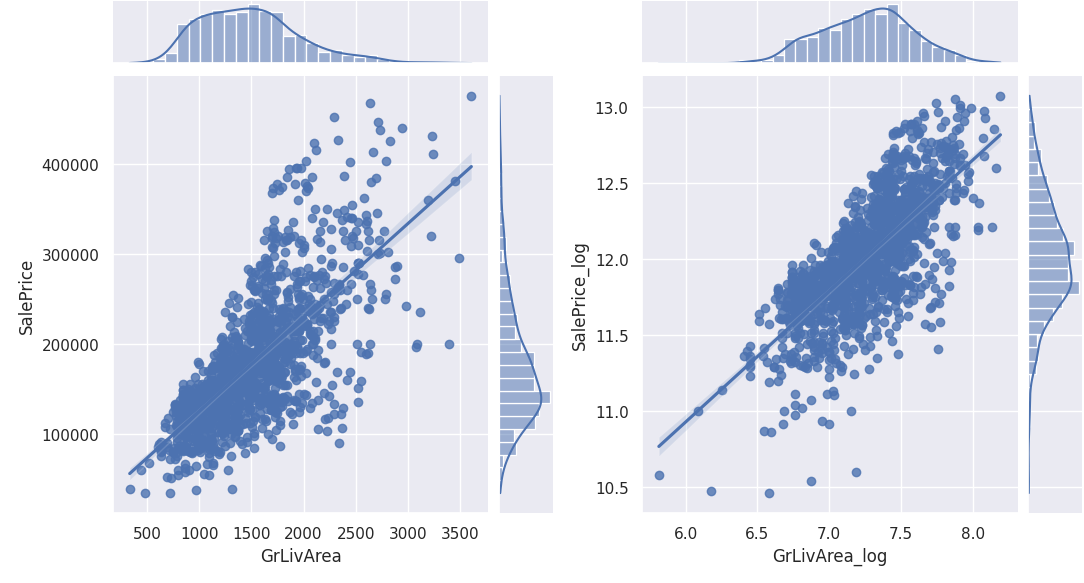

In [146]:
from scipy.stats import zscore
example = train_df.copy()
example['SalePrice_log'] = np.log1p(example['SalePrice'])
example['GrLivArea_log'] = np.log1p(example['GrLivArea'])

sns.set()
import matplotlib.gridspec as gridspec
import SeabornFig2Grid as sfg
pp = sns.jointplot(x='GrLivArea', y='SalePrice', data=example, kind='reg')
pp2 = sns.jointplot(x='GrLivArea_log', y='SalePrice_log', data=example, kind='reg')

fig = plt.figure(figsize=(11,6))
gs = gridspec.GridSpec(1,2)

sfg.SeabornFig2Grid(pp, fig, gs[0])
sfg.SeabornFig2Grid(pp2, fig, gs[1])
plt.tight_layout()
plt.show()

### 【特徵轉換】

### 針對部份的數值欄位，將其轉換為類別欄位

有一些數值欄位，其實比較像是類別欄位，它們和目標變數並沒有相關性，因此最好將它們進行轉換。

1. 首先，先針對 MSSubClass(建築類型), OverallCond(建材品質), MoSold(賣出月份), YrSold(賣出年份)，這幾個都是其它 Blogger 已經確認需要轉為類別的變數<br/>
   ->> 參考：https://www.kaggle.com/eiosifov/non-logarithm-house-pricing-randomforestregressor#Dealing-with-categorical-values

2. 因此我們試著以相關係數，來找出哪些數值欄位，與目標變數的相關性小於絕對值 0.1

3. 例如，針對 BsmtHalfBath (地下層半間浴室)，可以看到訓練集和測試集，都只有三個值，因此將其轉為類別

4. 例如，針對 PoolArea (泳池面積)，因為我們看到它的值幾乎都是在 0，因此可以把這個欄位從訓練與測試集中刪除

#### 找出與目標變數的相關係數小於 0.1 的欄位名稱

In [147]:
train_df_corr = train_df.select_dtypes(include='integer').corr()['SalePrice']
values = train_df_corr[abs(train_df_corr) < 0.1].index.values

values

array(['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF',
       'BsmtHalfBath', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold',
       'YrSold'], dtype=object)

#### 搜尋 unique 數值過少的欄位名稱

在這裡我假定如果數值欄位的unique值過少，而且和target variable的相關性又太低，那麼它就應該可以被treated as categorical variable.

In [148]:
# 搜尋數值欄位的 unique value < 20個的欄位名
# MSSubClass(建築類型), OverallCond(建材品質), BsmtHalfBath(地下層半間浴室),
# 3SsnPorch(三季門廊面積), PoolArea(泳池面積), MoSold(賣出月份), YrSold(賣出年份)
num2cat = []
for val in values:
    if len(train_df[val].unique()) < 20:
        num2cat.append(val)

num2cat

['MSSubClass',
 'OverallCond',
 'BsmtHalfBath',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

#### 例如，觀察 BsmtHalfBath 欄位，可以看到 SalePrice 和 BsmtHalfBath 的數值大小沒關連

In [149]:
val = 'BsmtHalfBath'
train_df[[val, 'SalePrice']].groupby([val]).agg({
    'SalePrice':'median',
    val:'count'
}).sort_values(by='SalePrice', ascending=False)

SalePrice  BsmtHalfBath
BsmtHalfBath                         
0            162900.000          1362
2            160850.500             2
1            158250.000            78

#### 例如，觀察 PoolArea 欄位，可以看到 PoolArea 的數值幾乎集中在 0 一個值身上，可以把這個欄位可以刪掉

In [150]:
val = 'PoolArea'
train_df[[val, 'SalePrice']].groupby([val]).agg({
    'SalePrice':'median',
    val:'count'
}).sort_values(by='SalePrice', ascending=False)

SalePrice  PoolArea
PoolArea                     
738      274970.000         1
519      250000.000         1
512      235000.000         1
648      181000.000         1
576      171000.000         1
0        162000.000      1437

In [151]:
num2cat

['MSSubClass',
 'OverallCond',
 'BsmtHalfBath',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

#### 數值欄位轉類別

In [152]:
# 先將不需要用到的變數刪除
num2cat.remove('3SsnPorch')  # 3SsnPorch(三季門廊面積) 看似不相關的數值變數，可刪除
num2cat.remove('PoolArea')  # PoolArea(泳池面積) 看似不相關的數值變數，可刪除
num2cat.remove('OverallCond')  # OverallCond(建材品質) 屬於 ordinal variable
num2cat.remove('MoSold')  # MoSold(賣出月份) 屬於 ordinal variable
num2cat.remove('YrSold')  # YrSold(賣出年份) 屬於 ordinal variable

num2cat

['MSSubClass', 'BsmtHalfBath']

In [153]:
# 剩下 MSSubClass(建築類型), BsmtHalfBath(地下層半間浴室)
# 將訓練集和測試集的 numerical feature 轉換為 string
for col in num2cat:
    train_df[col] = train_df[col].astype('str')
    test_df[col] = test_df[col].astype('str')

### 針對有順序性的變數，進行 OridinalEncode

參考其它Kernel作者，將這些欄位挑選出來，轉換有順序性的數值變數<br/>
->> https://github.com/Moeinh77/Kaggle-House-Prices-Advanced-Regression-Techniques/blob/master/data_pre_processing_housing_kaggle.ipynb

In [154]:
# BsmtQual(地下層高度), BsmtCond(地下層狀況), GarageQual(車庫品質), GarageCond(車庫條件)
# ExterQual(外部材質品質), ExterCond(外部材質狀況), HeatingQC(暖氣品質), KitchenQual(廚房品質)
# 以Ex, Gd, TA, Fa, Po來表示高低之分, NA為缺失值
ordi_cols_1 = ['BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
               'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']
for val in ordi_cols_1:
    train_df[val].replace(to_replace=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                          value=[0, 1, 2, 3, 4, 5],
                          inplace=True)
    test_df[val].replace(to_replace=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                          value=[0, 1, 2, 3, 4, 5],
                          inplace=True)

In [155]:
# BsmtFinType1(地下層居住品質), BsmtFinType2(地下層第二處生活品質)
# 以GLQ, ALQ, BLQ, Rec, LwQ, Unf來表示高低之分, NA為缺失值
ordi_cols_2 = ['BsmtFinType1', 'BsmtFinType2']
for val in ordi_cols_2:
    train_df[val].replace(to_replace=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                          value=[0, 1, 2, 3, 4, 5, 6],
                          inplace=True)
    test_df[val].replace(to_replace=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                          value=[0, 1, 2, 3, 4, 5, 6],
                          inplace=True)

In [156]:
# BsmtExposure(地下層對外通風品質), 以Gd, Av, Mn, No來表示高低之分, NA為缺失值
train_df['BsmtExposure'].replace(to_replace=['NA', 'No', 'Mn', 'Av', 'Gd'],
                                 value=[0, 1, 2, 3, 4],
                                 inplace=True)
test_df['BsmtExposure'].replace(to_replace=['NA', 'No', 'Mn', 'Av', 'Gd'],
                                 value=[0, 1, 2, 3, 4],
                                 inplace=True)

# CentralAir(是否有中央空調), Y為有，N為無，NA為缺失值
train_df['CentralAir'].replace(to_replace=['NA', 'N', 'Y'],
                               value=[0, 1, 2],
                               inplace=True)
test_df['CentralAir'].replace(to_replace=['NA', 'N', 'Y'],
                               value=[0, 1, 2],
                               inplace=True)

# Functional(房屋功能性評分), 以Typ, Min1, Min2, Mod, Maj1, Maj2, Sev, Sal來表示高低之分, NA為缺失值
train_df['Functional'].replace(to_replace=['NA', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
                               value=[0, 1, 2, 3, 4, 5, 6, 7, 8],
                               inplace=True)
test_df['Functional'].replace(to_replace=['NA', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
                               value=[0, 1, 2, 3, 4, 5, 6, 7, 8],
                               inplace=True)

# GarageFinish(車庫內裝潢完整度), 以Fin, RFn, Unf來表示高低之分, NA為缺失值
train_df['GarageFinish'].replace(to_replace=['NA', 'Unf', 'RFn', 'Fin'],
                                 value=[0, 1, 2, 3],
                                 inplace=True)
test_df['GarageFinish'].replace(to_replace=['NA', 'Unf', 'RFn', 'Fin'],
                                 value=[0, 1, 2, 3],
                                 inplace=True)

# LandSlope(土地斜度), 以Gtl, Mod, Sev來表示高低之分, NA為缺失值
train_df['LandSlope'].replace(to_replace=['NA', 'Sev', 'Mod', 'Gtl'],
                              value=[0, 1, 2, 3],
                              inplace=True)
test_df['LandSlope'].replace(to_replace=['NA', 'Sev', 'Mod', 'Gtl'],
                              value=[0, 1, 2, 3],
                              inplace=True)

# LotShape(物業形狀), 以Reg, IR1, IR2, IR3來表示高低之分, NA為缺失值
train_df['LotShape'].replace(to_replace=['NA', 'IR3', 'IR2', 'IR1', 'Reg'],
                             value=[0, 1, 2, 3, 4],
                             inplace=True)
test_df['LotShape'].replace(to_replace=['NA', 'IR3', 'IR2', 'IR1', 'Reg'],
                             value=[0, 1, 2, 3, 4],
                             inplace=True)

# PacedDrive(車道鋪設材質), 以Y, P, N來表示高低之分, NA為缺失值
train_df['PavedDrive'].replace(to_replace=['NA', 'N', 'P', 'Y'],
                               value=[0, 1, 2, 3],
                               inplace=True)
test_df['PavedDrive'].replace(to_replace=['NA', 'N', 'P', 'Y'],
                               value=[0, 1, 2, 3],
                               inplace=True)

# Street(街道鋪設類型), Pave為石塊路面, Grvl為碎石路面, NA為缺失值
train_df['Street'].replace(to_replace=['NA', 'Grvl', 'Pave'],
                           value=[0, 1, 2],
                           inplace=True)
test_df['Street'].replace(to_replace=['NA', 'Grvl', 'Pave'],
                           value=[0, 1, 2],
                           inplace=True)

### .
<font size=5 color="red">
    <b>【變數篩選】<b>
</font>

### 使用 RandomForest 來挑選重要的變數

**因為訓練資料 size，並沒有比特徵變數多很多，所以可以嘗試，挑出重要的變數，進行降維來建模。**

- SKlearn當中的Feature Selection章節，值得一讀：<br/>https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-using-selectfrommodel
- 方法一：可以使用Lasso Regression(L1)來挑選適合的變數，去除掉過多無意義的變數，或是[共線性的變數](https://www.jamleecute.com/regularized-regression-ridge-lasso-elastic/)
    - 其中sklearn有簡化版的函數(使用LassoCV)，可以來自動找出適合的regularization超參數(alpha值)，而不需要再設定GridSearchCV
- 方法二：或是使用Random Forest，來找出Feature Importance，進而挑選出適合的變數，去除掉過多無意義的變數
    - 之後再繪製correlation matrix，看特徵變數之間的相關性高不高，來檢查有沒有出現共線性的可能

In [157]:
from sklearn.ensemble import RandomForestRegressor

X = train_df.copy()
X.pop('SalePrice')
X = pd.get_dummies(X)
print("Number of unfiltered columns: ", X.shape)

rf = RandomForestRegressor(
     random_state=20,
     n_estimators=500,
     min_samples_leaf=0.01)

rf.fit(X, y)

Number of unfiltered columns:  (1442, 229)


RandomForestRegressor(min_samples_leaf=0.01, n_estimators=500, random_state=20)

In [158]:
# 製作feature importance的資料表
ft_ip = pd.Series(
    data = rf.feature_importances_,
    index = X.columns,
    name = 'feature_importance')

ft_ip = ft_ip.sort_values(ascending=False)
cum_sum = ft_ip.cumsum()
cum_sum.name = 'ft_ip_cumsum'
ft_ip = pd.concat([ft_ip, cum_sum], axis=1)

In [159]:
# 篩選變數解釋佔比 < 0.9999
cols_idx = ft_ip[ft_ip['ft_ip_cumsum'] < 0.9999].index

ft_ip.loc[cols_idx,:]

feature_importance  ft_ip_cumsum
OverallQual                       0.618         0.618
GrLivArea                         0.123         0.741
TotalBsmtSF                       0.048         0.789
GarageCars                        0.039         0.828
GarageArea                        0.031         0.860
...                                 ...           ...
MasVnrType_None                   0.000         1.000
SaleType_WD                       0.000         1.000
RoofStyle_Gable                   0.000         1.000
HouseStyle_1.5Fin                 0.000         1.000
Exterior1st_Wd Sdng               0.000         1.000

[70 rows x 2 columns]

In [160]:
# 搜集變數名稱
print('Length of cols(inflated by dummy variables): {}'.format(len(cols_idx)))
cols = [i.split('_')[0] for i in cols_idx.values]
cols = list(set(cols))
print('Lenght of unique cols: {}'.format(len(cols)))

Length of cols(inflated by dummy variables): 70
Lenght of unique cols: 54


### 觀察經過篩選後的變數之間的特徵相關性並畫出較高相關性的圖

In [161]:
# cols: 經過RandomForest變數篩選後，要留下要使用的變數
select_cols = cols + ['SalePrice']

In [162]:
# 下面計算在select_cols中，有多少個數值型欄位
train_df[select_cols].info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Columns: 55 entries, FullBath to SalePrice
dtypes: float64(2), int64(38), object(15)
memory usage: 619.7+ KB


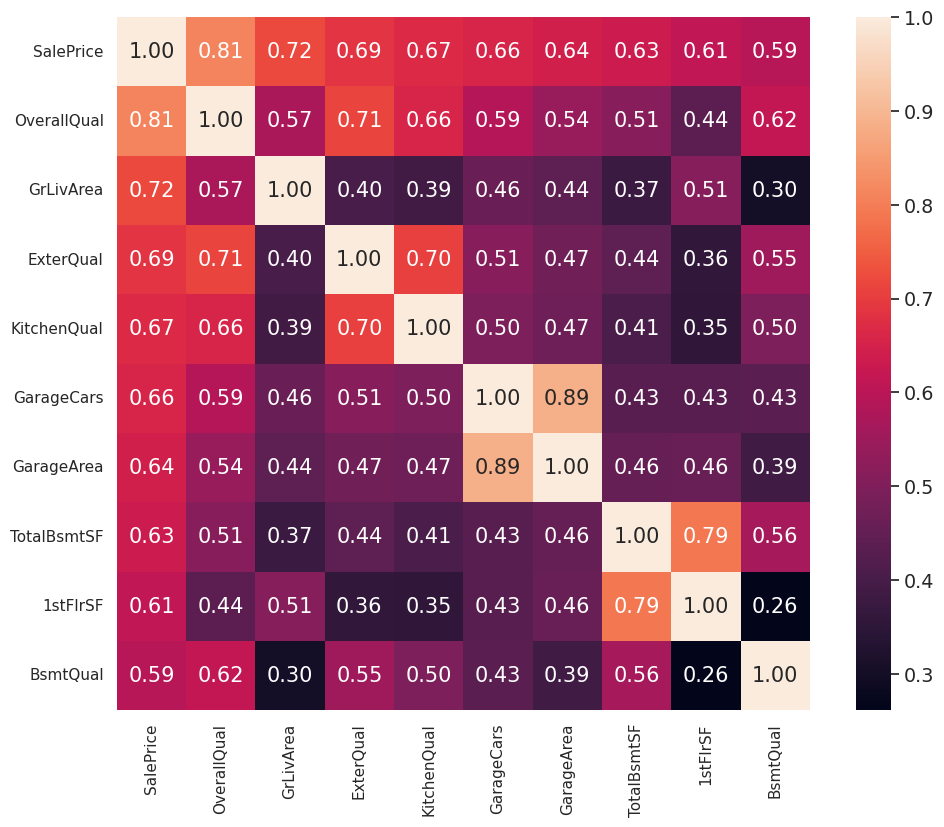

In [163]:
#saleprice correlation matrix
f1, ax = plt.subplots(figsize=(12, 9))
k = 10 #number of variables for heatmap
corrmat = train_df[select_cols].corr()
col = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[col].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=col.values, xticklabels=col.values)
plt.show()

In [164]:
continuous = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
discrete = ['OverallQual', 'ExterQual', 'KitchenQual', 'GarageCars', 'BsmtQual']

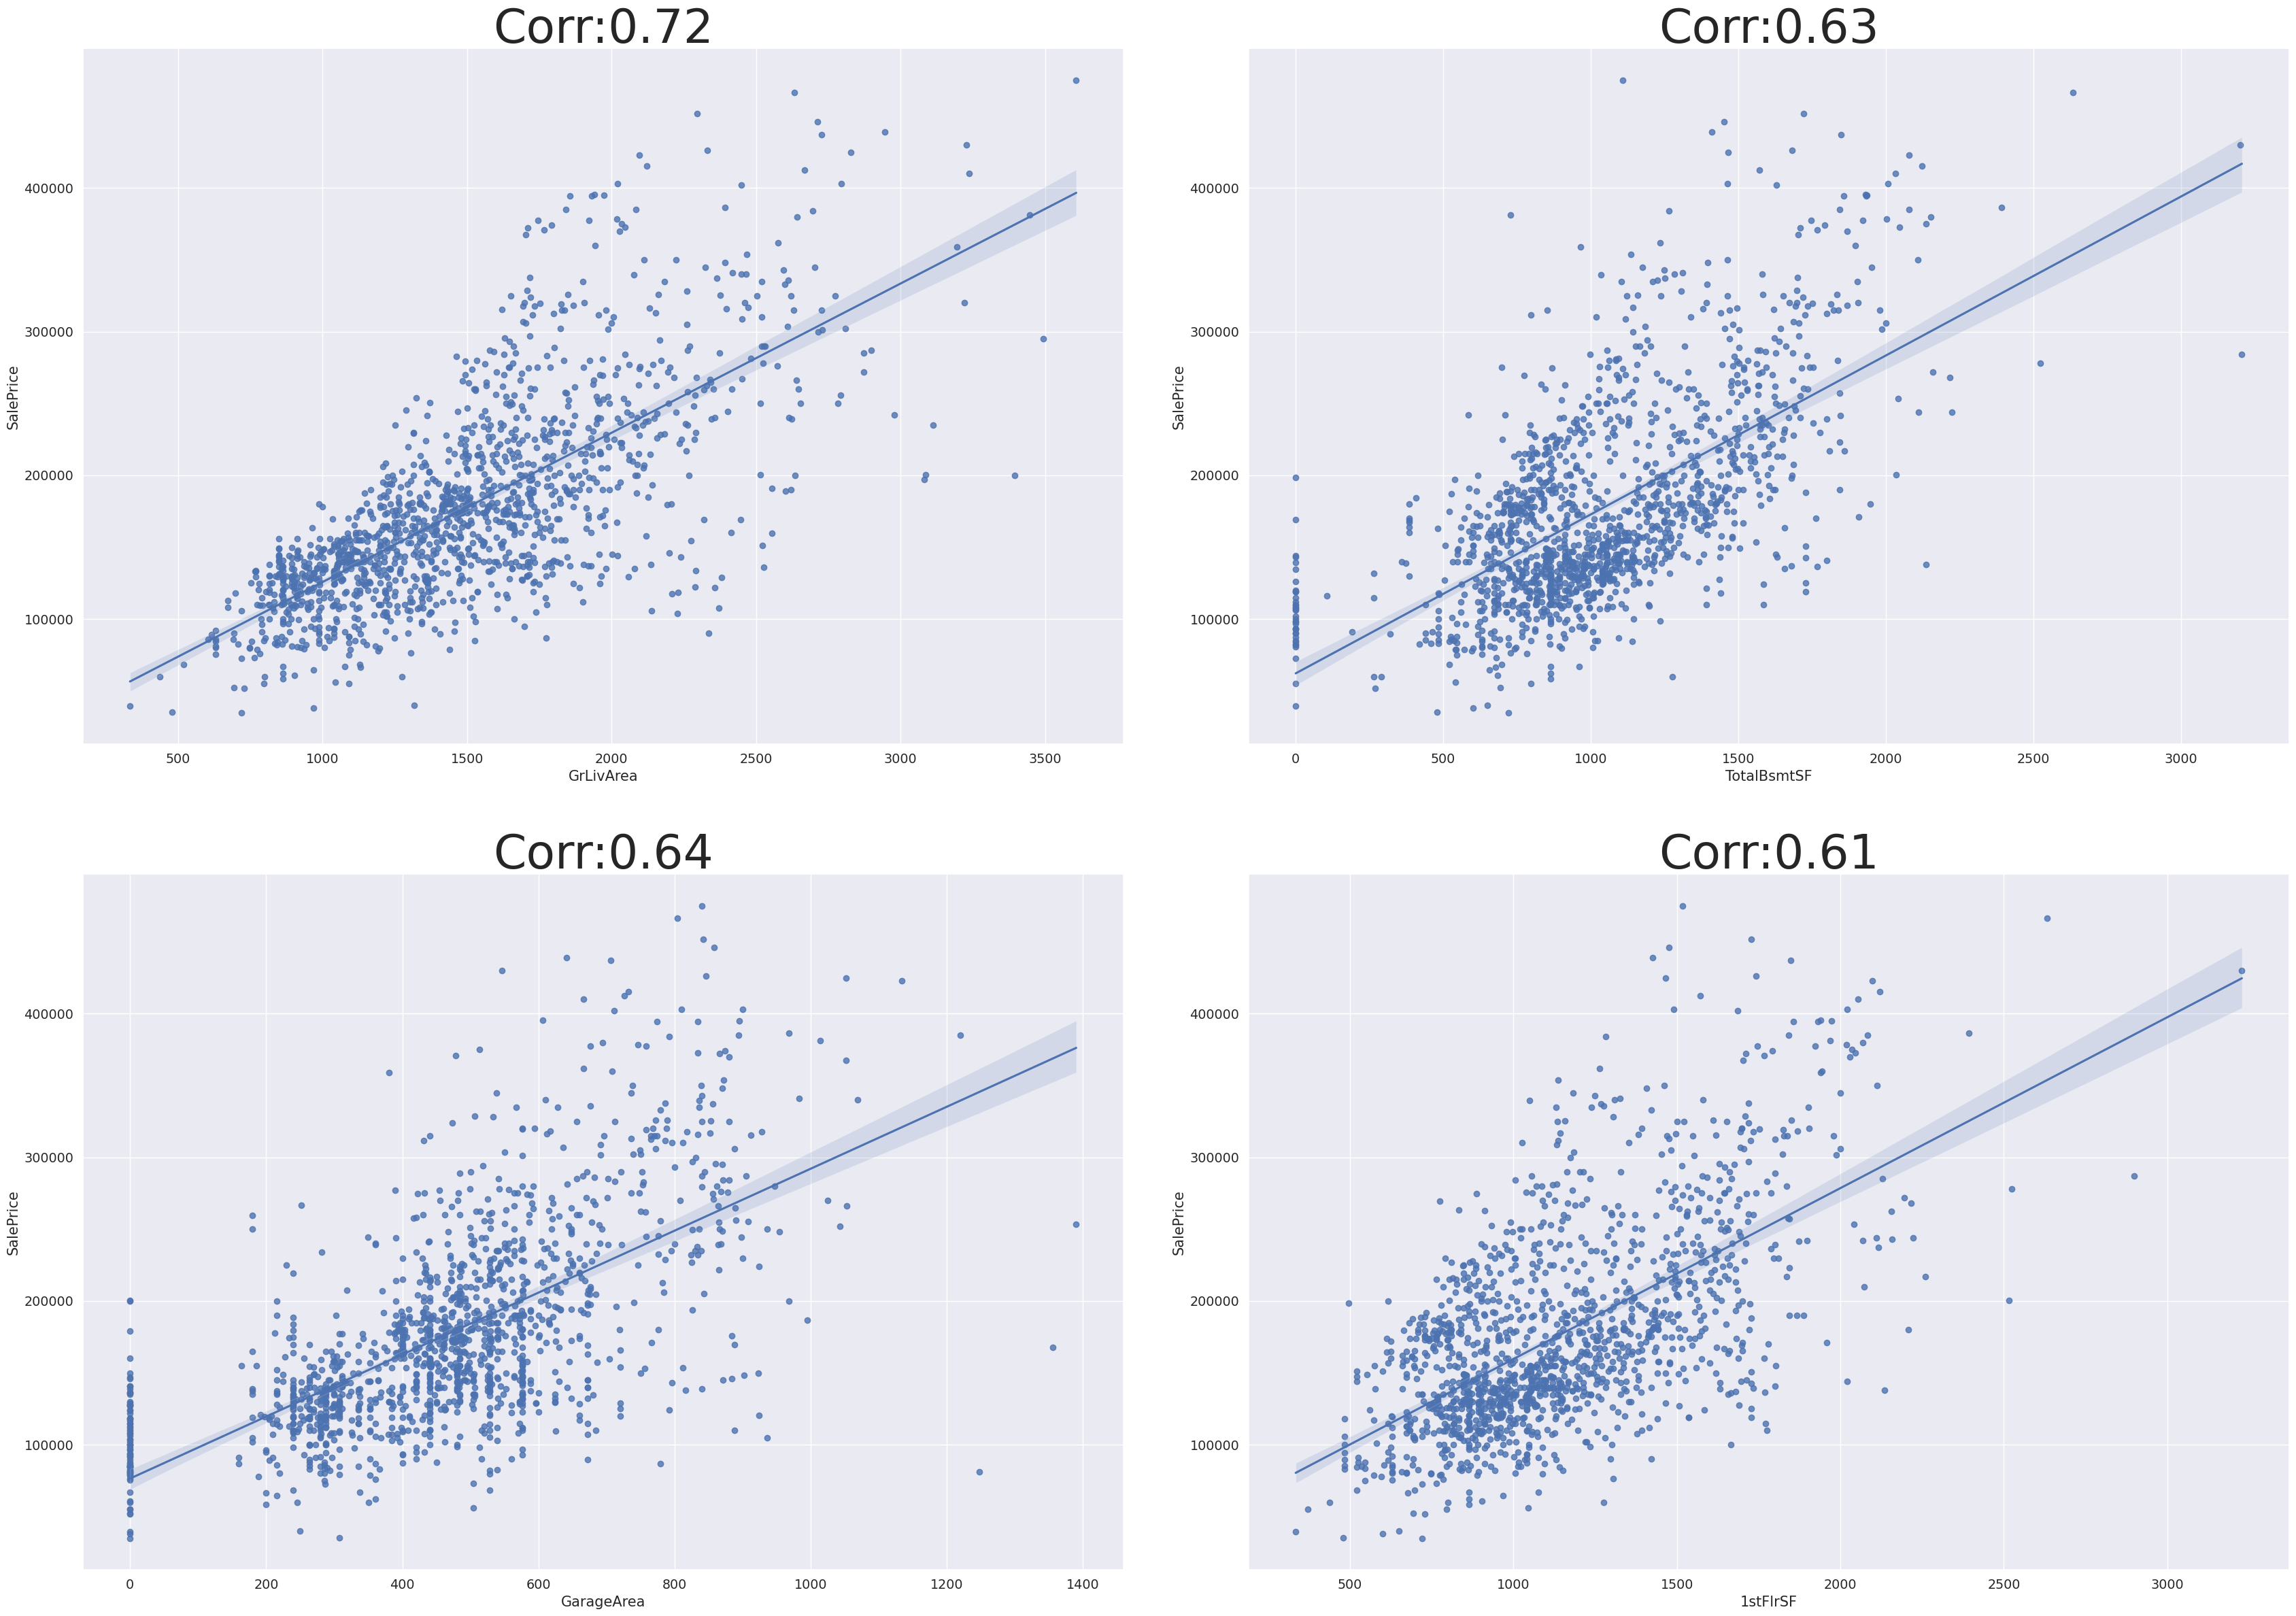

In [165]:
rcParams['figure.figsize'] = (35, 25)
fig, axes = plt.subplots(2, 2)
sns.set(font_scale=4)
for i in range(len(continuous)):
    if i < 2:
        pp = sns.regplot(data=train_df, x=continuous[i], y='SalePrice', ax=axes[i,0])
        pp.set_title('Corr:%.2f' % np.corrcoef(train_df['SalePrice'], train_df[continuous[i]])[0,1],size=50)
    else:
        pp2 = sns.regplot(data=train_df, x=continuous[i], y='SalePrice', ax=axes[i-2,1])
        pp2.set_title('Corr:%.2f' % np.corrcoef(train_df['SalePrice'], train_df[continuous[i]])[0,1],size=50)
    plt.tight_layout()

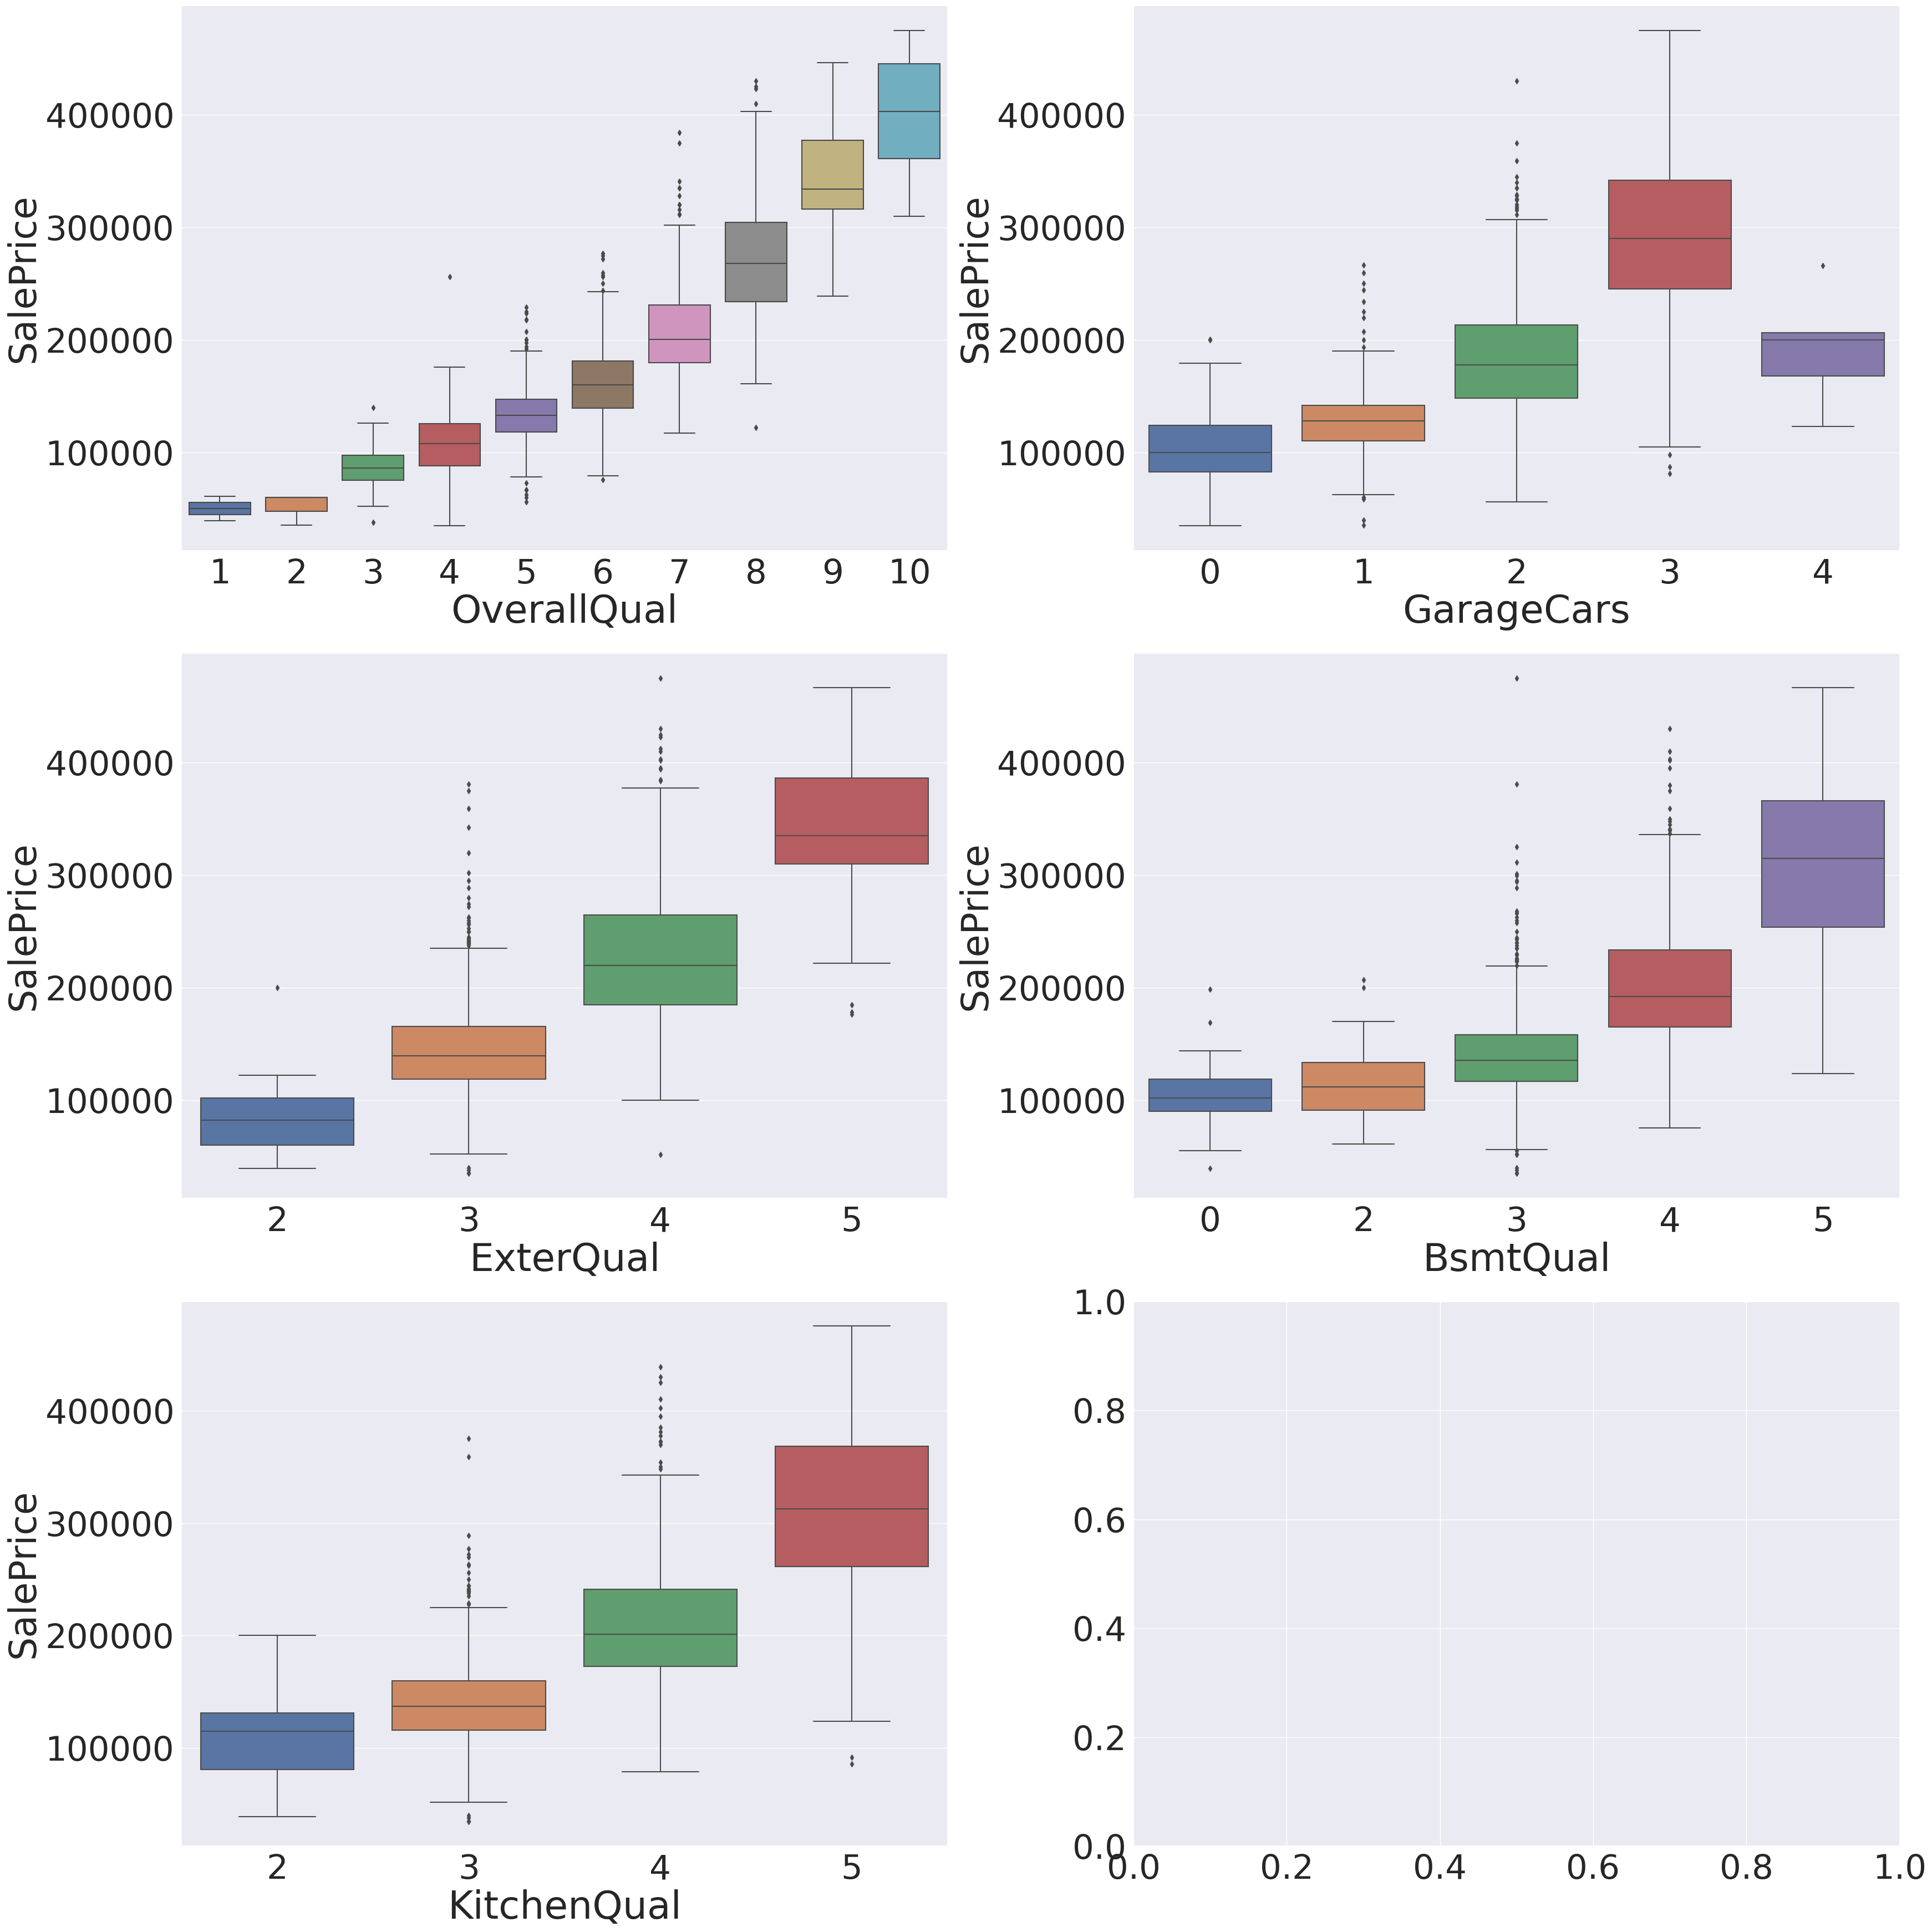

In [166]:
sns.set(font_scale=4)
rcParams['figure.figsize'] = (35,35)
fig, axes = plt.subplots(3, 2)
sns.set(color_codes=True)
for i in range(len(discrete)):
    if i < 3:
        pp = sns.boxplot(data=train_df, x=discrete[i], y='SalePrice', ax=axes[i,0])
        pp.set_xlabel(discrete[i], fontsize=50)
    else:
        pp2 = sns.boxplot(data=train_df, x=discrete[i], y='SalePrice', ax=axes[i-3,1])
        pp2.set_xlabel(discrete[i], fontsize=50)
    plt.tight_layout()

### 針對類別變數，進行OneHotEncode，針對數值變數，進行Rescaling

- 同時進行`OneHotEncode`和`數值變數標準化`，可以看一下Sklearn新的column transformer的用法，是一種簡潔的 Pipline Wrapper. ->> https://www.codercto.com/a/31047.html

In [167]:
num_cols = train_df[cols].select_dtypes(include=np.number).columns.values
cat_cols = train_df[cols].select_dtypes(include='object').columns.values

In [168]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', MinMaxScaler(), num_cols)],
    verbose=True)

In [169]:
# Apply 在訓練資料集
X = preprocessor.fit_transform(train_df[cols])
X.shape

[ColumnTransformer] ........... (1 of 2) Processing cat, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing num, total=   0.0s


(1442, 177)

In [170]:
# Apply 在測試資料集
X_test = preprocessor.transform(test_df[cols])
X_test.shape

(1459, 177)

## 3.模型驗證

### 【資料切分】

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=2022, test_size=0.2)

In [172]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [173]:
def rmse(model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    RMSE_train = np.sqrt(mean_squared_error(y_train, pred_train))
    RMSE_val = np.sqrt(mean_squared_error(y_val, pred_val))
    return RMSE_train, RMSE_val

In [174]:
models = [LinearRegression(), Lasso(), KNeighborsRegressor(), SVR(),
          DecisionTreeRegressor(), RandomForestRegressor(),
          XGBRegressor(objective ='reg:squarederror')]

names = ['LR', 'Lasso', 'KNN', 'SVR', 'DT', 'RF', 'XGB']
for name, model in zip(names, models):
    RMSE_train, RMSE_val = rmse(model, X_train, X_val, y_train, y_val)
    print(f'{name}:')
    print(f'　　Training RMSE: {RMSE_train:.4f}, Validation RMSE: {RMSE_val:.4f}')

LR:
　　Training RMSE: 0.0945, Validation RMSE: 150761080283.1326
Lasso:
　　Training RMSE: 0.3793, Validation RMSE: 0.4021
KNN:
　　Training RMSE: 0.1557, Validation RMSE: 0.2174
SVR:
　　Training RMSE: 0.0796, Validation RMSE: 0.1211
DT:
　　Training RMSE: 0.0000, Validation RMSE: 0.2052
RF:
　　Training RMSE: 0.0493, Validation RMSE: 0.1444
XGB:
　　Training RMSE: 0.0076, Validation RMSE: 0.1338


In [175]:
# 進行測試集的預測
xgb_pred_y = np.expm1(models[-1].predict(X_test))

# 製作 submit 的資料集
submit_file = pd.DataFrame({'Id': test_df.Id, 'SalePrice': xgb_pred_y})
submit_file.to_csv('./submission.csv', index=False)

### .
<font size=5 color="red">
    <b>【模型調參、交叉驗證】<b>
</font>

In [176]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
from sklearn.metrics import make_scorer
from sklearn.base import clone

### 先自己設定一個 Gridsearch 的函數，來得到最好的參數

以下嘗試使用`RandomizedSearchCV`的方法，但需要檢查一下模型的超參數是接受浮點數或是整數值，並且 import scipy 的統計分配函數，供 RandomizedSearchCV 使用

In [177]:
# 使用scipy的統計分配函數
from scipy.stats import uniform, randint, expon, beta

def fitGridModel(model, params, train_x, train_y):
    '''define a function to implement GridSearch all in one'''
    reg_model = clone(model)
    best_params = {}

    scorer = make_scorer(mean_squared_error, greater_is_better=False)
    grid = RandomizedSearchCV(reg_model,
                              param_distributions=params,
                              scoring=scorer,
                              cv=5,
                              n_iter=10,
                              n_jobs=8,
                              random_state=2022,
                              verbose=1)
    grid.fit(train_x, train_y)
    score = np.sqrt(abs(grid.best_score_))  # root of mse
    print(
        "the best rmse of all model parameters' combination on model: {:.4f}".format(score))
    best_params.update(grid.best_params_)
    print("the parameter setting of optimized model:", grid.best_estimator_)

    return score, best_params, grid

### 每個模型的參數搜尋設定

### Lasso
Lasso Regression：能夠調整 α 係數，當 α 越大，對於影響較小的特徵係數給予收縮至 0 ，捨棄該特徵，達到正則化效果。

In [178]:
# Lasso
las_score, las_params, las_grid_model = fitGridModel(
    model=Lasso(),
    params={
        "alpha": expon(loc=0, scale=0.001),
        "max_iter": randint(low=100000, high=1000000)
    },
    train_x=X,
    train_y=y)

# 參考的最適參數解答 (0.1082)：
# Lasso(alpha=0.0003589750100730223, copy_X=True, fit_intercept=True,
#      max_iter=993075, normalize=False, positive=False, precompute=False,
#      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
the best rmse of all model parameters' combination on model: 0.1082
the parameter setting of optimized model: Lasso(alpha=0.0003589750100730223, max_iter=993075)


### KernelRidge
KernelRidge: 這個方法將kernel的概念套用到Ridge regression上，直觀的想法是先使用kernel參數對數據進行映射成線性可分(poly)或是超平面(rbf)上，在使用Ridge regression進行預測。

In [179]:
# KernelRidge
krr_score, krr_params, krr_grid_model = fitGridModel(
    model=KernelRidge(),
    params={
        "alpha": uniform(loc=0.5, scale=0.2),
        "kernel": ['polynomial'],
        "degree": [2],
        "coef0": uniform(loc=2, scale=2)
    },
    train_x=X,
    train_y=y)

# 參考最適參數的解答 (0.1164)：
# KernelRidge(alpha=0.5018717227615529, coef0=2.9981156217039757, degree=2,
#            gamma=None, kernel='polynomial', kernel_params=None)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
the best rmse of all model parameters' combination on model: 0.1164
the parameter setting of optimized model: KernelRidge(alpha=0.5018717227615529, coef0=2.9981156217039757, degree=2,
            kernel='polynomial')


### SVR
SVM Regression：常用的kernel有三種，linear,polynomial,rbf，其中這三個kernel有共同的懲罰項係數C可以調整，C越大越容易overfitting，而其中polynomial,rbf分別有degree,gamma參數可以調整，polynomial是透過次方項係數degree將線性不可分的特徵映射至線性可分，degree越大越容易overfitting，而rbf是透過gamma來調整，其思想是以泰勒展開式能夠表示任何連續可微n次多項式來逼近最佳迴歸線，gamma越大越容易overfitting。

In [180]:
# SVR
svr_score, svr_params, svr_grid_model = fitGridModel(
    model=SVR(),
    params={
        'C': randint(low=15, high=25),
        'gamma': beta(a=2, b=20, loc=0, scale=0.001),
        'epsilon': beta(a=2, b=20, loc=0, scale=0.01)
    },
    train_x=X,
    train_y=y)

# 參考的最適參數解答 (rmse: 0.1254)：
# SVR(C=22, cache_size=200, coef0=0.0, degree=3, epsilon=0.00041219573609133553,
#    gamma=0.00015144621802647064, kernel='rbf', max_iter=-1, shrinking=True,
#    tol=0.001, verbose=False)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
the best rmse of all model parameters' combination on model: 0.1254
the parameter setting of optimized model: SVR(C=22, epsilon=0.00041219573609133553, gamma=0.00015144621802647064)


### XGboost

In [184]:
# XGBoost 10min
xgb_score, xgb_params, xgb_grid_model = fitGridModel(xgb.XGBRegressor(),
                            params={
                                'objective': ['reg:squarederror'],
                                'learning_rate': beta(a=2, b=20, loc=0, scale=0.1),
                                'n_estimators': randint(low=2500, high=3500),
                                'gamma': beta(a=2,b=20, loc=0, scale=0.01),
                                'colsample_bytree': uniform(loc=0.6, scale=0.2),
                                'subsample': uniform(loc=0.6, scale=0.2),
                                'max_depth': [2, 3],
                                'min_child_weight': [0, 1, 2],
                                'reg_alphs': expon(loc=0, scale=0.01),
                                'seed': [27],
                                'scale_pos_weight': [1],
                                'reg_alpha': beta(a=2, b=20, loc=0, scale=0.0001)
                            },
                            train_x=X,
                            train_y=y)

# 參考的最適參數解答 (rmse: 0.1081)：
#XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.7477012487323618,
#              gamma=0.0002755486359294577, importance_type='gain',
#              learning_rate=0.015837204927540233, max_delta_step=0, max_depth=3,
#              min_child_weight=1, missing=None, n_estimators=2625, n_jobs=1,
#              nthread=None, objective='reg:squarederror', random_state=0,
#              reg_alpha=2.463937254314719e-06, reg_alphs=0.005391419850182207,
#              reg_lambda=1, scale_pos_weight=1, seed=27, silent=None,
#              subsample=0.6258496852056329, verbosity=1)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[02:56:00] WARNING: ../src/learner.cc:767: 
Parameters: { "reg_alphs" } are not used.

the best rmse of all model parameters' combination on model: 0.1075
the parameter setting of optimized model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6018717227615529, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0003297510604430244, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.014190851944937372, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=2959, n_jobs=None, num_parallel_tree=None,

In [185]:
# 進行測試集的預測
xgb_grid_pred_y = np.expm1(xgb_grid_model.predict(X_test))

# 製作 submit 的資料集
submit_file = pd.DataFrame({'Id': test_df.Id, 'SalePrice': xgb_grid_pred_y})
submit_file.to_csv('./submission.csv', index=False)

## 4.模型集成

### 搜集每個模型的最適參數

In [186]:
# Collect the best params for each model
import pprint

params = {Lasso.__name__:las_params,
          KernelRidge.__name__:krr_params,
          SVR.__name__: svr_params,
          xgb.XGBRegressor.__name__: xgb_params}

pprint.pprint(params)

{'KernelRidge': {'alpha': 0.5018717227615529,
                 'coef0': 2.9981156217039757,
                 'degree': 2,
                 'kernel': 'polynomial'},
 'Lasso': {'alpha': 0.0003589750100730223, 'max_iter': 993075},
 'SVR': {'C': 22,
         'epsilon': 0.00041219573609133553,
         'gamma': 0.00015144621802647064},
 'XGBRegressor': {'colsample_bytree': 0.6018717227615529,
                  'gamma': 0.0003297510604430244,
                  'learning_rate': 0.014190851944937372,
                  'max_depth': 2,
                  'min_child_weight': 2,
                  'n_estimators': 2959,
                  'objective': 'reg:squarederror',
                  'reg_alpha': 9.319000928373296e-06,
                  'reg_alphs': 0.006828753764052282,
                  'scale_pos_weight': 1,
                  'seed': 27,
                  'subsample': 0.6679018949174982}}


### 使用四個模型的加權平均，來計算分數
<font size=5 color="red">
    <b>【Blending】<b>
</font>

In [187]:
# 使用簡單平均的權重：
x = X
true_y = y.values

models = [las_grid_model, svr_grid_model, krr_grid_model, xgb_grid_model]
blend_y = np.sum([1/len(models)*reg.predict(x) for reg in models], axis=0)
rmse = np.sqrt(abs(mean_squared_error(true_y, blend_y)))
print("RMSE of train dataset: ", rmse)

RMSE of train dataset:  0.09203225701206759


In [188]:
# 進行測試集的預測
blend_y = np.sum([1/len(models)*np.expm1(reg.predict(X_test)) for reg in models], axis=0)
submit_file = pd.DataFrame({'Id': test_df.Id, 'SalePrice': blend_y})
submit_file.to_csv('./submit_blend_y.csv', index=False)

### .
<font size=5 color="red">
    <b>【Stacking】<b>
</font>
        
使用`mlxtend`套件，也包含可以使用超參數 Grid Search，但是需要花不少時間，在此略過，直接使用剛剛各個模型最適的超參數

In [189]:
!pip install -q mlxtend

In [190]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.model_selection import cross_val_score

RANDOM_SEED = 2022

# The StackingCVRegressor uses scikit-learn's check_cv
# internally, which doesn't support a random seed. Thus
# NumPy's random seed need to be specified explicitely for
# deterministic behavior

# use the optimized parameters from above
svr = SVR(**params['SVR'])
lasso = Lasso(**params['Lasso'])
krr = KernelRidge(**params['KernelRidge'])

xgbr = XGBRegressor(**params['XGBRegressor']) # meta-model

np.random.seed(RANDOM_SEED)
stack = StackingCVRegressor(regressors=[svr, lasso, krr],
                            meta_regressor=xgbr,
                            use_features_in_secondary=True)

stack_scores = cross_val_score(stack,
                               X,
                               y.values,
                               cv=5,
                               scoring='neg_mean_squared_error')

print("RMSE: %0.4f (+/- %0.4f)" %
      (np.sqrt(abs(stack_scores.mean())), stack_scores.std()))

[02:56:54] WARNING: ../src/learner.cc:767: 
Parameters: { "reg_alphs" } are not used.

[02:57:31] WARNING: ../src/learner.cc:767: 
Parameters: { "reg_alphs" } are not used.

[02:57:54] WARNING: ../src/learner.cc:767: 
Parameters: { "reg_alphs" } are not used.

[02:58:04] WARNING: ../src/learner.cc:767: 
Parameters: { "reg_alphs" } are not used.

[02:58:14] WARNING: ../src/learner.cc:767: 
Parameters: { "reg_alphs" } are not used.

RMSE: 0.1063 (+/- 0.0009)


In [191]:
# 再進行所有資料的refit
stack.fit(X, y.values)
stack_pred_y = stack.predict(X)

print("RMSE of train dataset: ", np.sqrt(abs(mean_squared_error(y.values, stack_pred_y))))

[02:58:24] WARNING: ../src/learner.cc:767: 
Parameters: { "reg_alphs" } are not used.

RMSE of train dataset:  0.06763954471636593


In [192]:
# 進行測試資料集的預測
stack_pred_y = np.expm1(stack.predict(X_test))
submit_file = pd.DataFrame({'Id': test_df.Id, 'SalePrice': stack_pred_y})
submit_file.to_csv('./submit_stack_y.csv', index=False)

## 額外補充 - [SHAP (SHapley Additive exPlanations)](https://github.com/slundberg/shap)
### shap 介紹文章：[可解釋 AI (XAI) 系列 — SHAP](https://medium.com/ai-academy-taiwan/可解釋-ai-xai-系列-shap-2c600b4bdc9e)

<img src="https://raw.githubusercontent.com/d246810g2000/Explainable_AI/e9d21a2febf425f87fa20ccca62547c34ecd60ae/ML/slide_image/shap_header.svg" width=600/>



In [193]:
import shap
# load JS visualization code to notebook
shap.initjs()

In [194]:
X = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())
X.head(5)

cat__RoofStyle_Flat  cat__RoofStyle_Gable  cat__RoofStyle_Gambrel  \
0                0.000                 1.000                   0.000   
1                0.000                 1.000                   0.000   
2                0.000                 1.000                   0.000   
3                0.000                 1.000                   0.000   
4                0.000                 1.000                   0.000   

   cat__RoofStyle_Hip  cat__RoofStyle_Mansard  cat__RoofStyle_Shed  \
0               0.000                   0.000                0.000   
1               0.000                   0.000                0.000   
2               0.000                   0.000                0.000   
3               0.000                   0.000                0.000   
4               0.000                   0.000                0.000   

   cat__LotConfig_Corner  cat__LotConfig_CulDSac  cat__LotConfig_FR2  \
0                  0.000                   0.000               0.000   
1                  0.000                   0.000               1.000   
2                  0.000                   0.000               0.000   
3                  1.000                   0.000               0.000   
4                  0.000                   0.000               1.000   

   cat__LotConfig_FR3  ...  num__Id  num__HalfBath  num__EnclosedPorch  \
0               0.000  ...    0.000          0.500               0.000   
1               0.000  ...    0.001          0.000               0.000   
2               0.000  ...    0.001          0.500               0.000   
3               0.000  ...    0.002          0.000               0.493   
4               0.000  ...    0.003          0.500               0.000   

   num__2ndFlrSF  num__OverallQual  num__KitchenQual  num__HeatingQC  \
0          0.470             0.667             0.667           1.000   
1          0.000             0.556             0.333           1.000   
2          0.476             0.667             0.667           1.000   
3          0.416             0.667             0.667           0.750   
4          0.579             0.778             0.667           1.000   

   num__TotRmsAbvGrd  num__GarageFinish  num__GarageCars  
0              0.500              0.667            0.500  
1              0.333              0.667            0.500  
2              0.333              0.667            0.500  
3              0.417              0.333            0.750  
4              0.583              0.667            0.750  

[5 rows x 177 columns]

In [195]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=2022, test_size=0.2)
xgbr = XGBRegressor(**params['XGBRegressor'])
xgbr.fit(X_train, y_train)
explainer = shap.TreeExplainer(xgbr)
shap_values = explainer(X_val)

[02:59:38] WARNING: ../src/learner.cc:767: 
Parameters: { "reg_alphs" } are not used.



In [196]:
print(f'length of SHAP values: {len(shap_values)}')
print(f'Shape of each element: {shap_values.shape}')

length of SHAP values: 289
Shape of each element: (289, 177)


#### Global interpretability
- 點的顏色: Feature value 的大小，越紅越大、越藍越小
- X 軸: 該點對於 shap value 的影響，也就是對預測值的影響。
- Y 軸: 各個 features

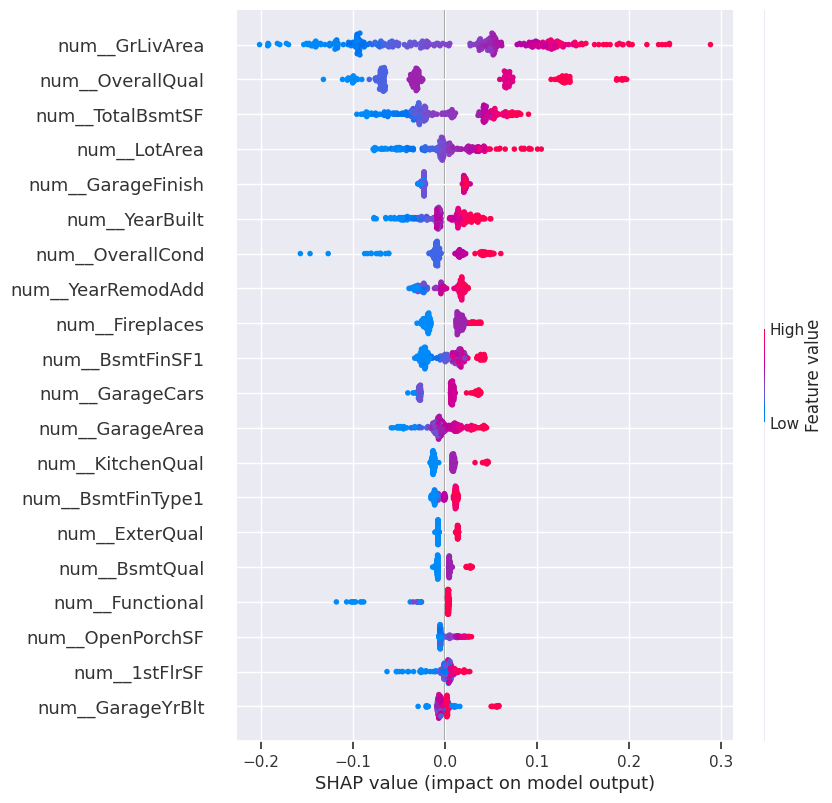

In [197]:
shap.summary_plot(shap_values, X_val)

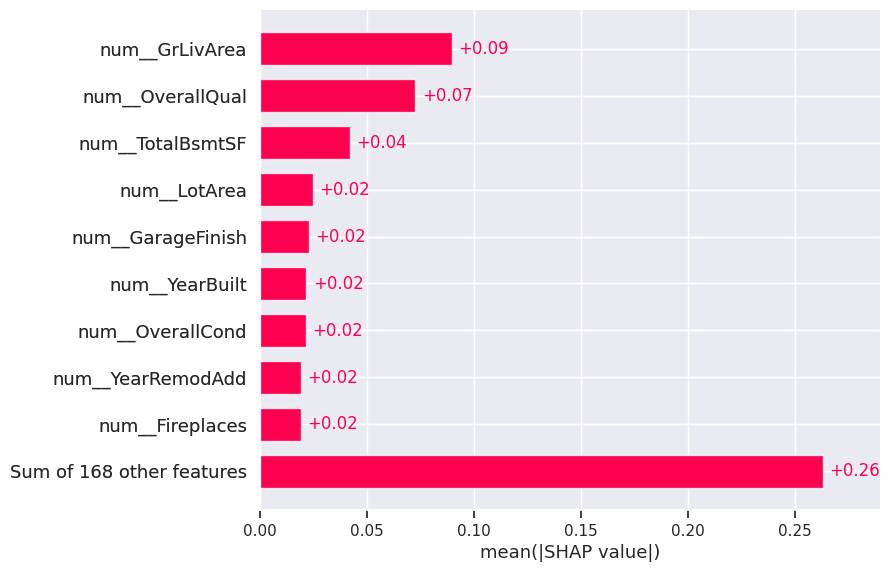

In [198]:
shap.plots.bar(shap_values)

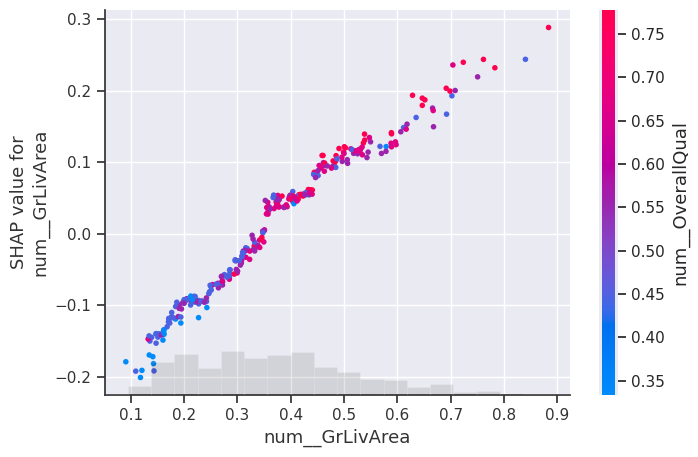

In [199]:
shap.plots.scatter(shap_values[:, "num__GrLivArea"], color=shap_values[:, "num__OverallQual"])

#### Local interpretability

Explain a single prediction from the test set

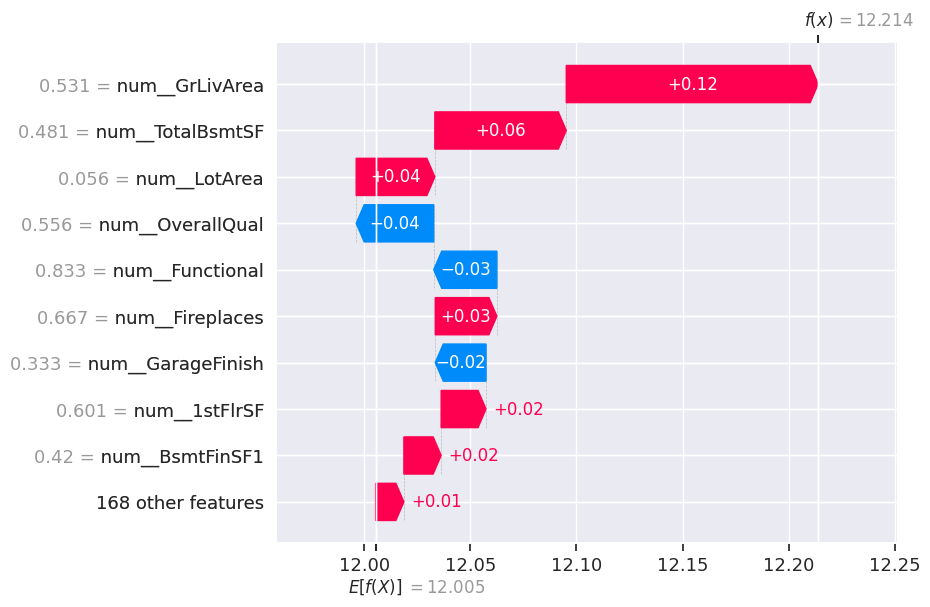

In [200]:
# waterfall
shap.plots.waterfall(shap_values[0])

In [201]:
# plot the SHAP values for output of the first instance
shap.initjs()
print(f'Prediction for 1st sample in X_val: {xgbr.predict(X_val.iloc[[0], :])[0]}')
shap.force_plot(explainer.expected_value, shap_values.values[0], X_val.iloc[0])

Prediction for 1st sample in X_val: 12.213866233825684


Explain all the predictions in the test set

In [202]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values, X_val)